# 1. 문제 정의
### 분석 목표
* 검진 데이터에서 다른 변수들을 사용해 혈청지오티 ALT 예측


※ ALT 증가의 원인은 간 염증, 간세포 손상 시 해당 효소가 혈액으로 흘러나와 수치가 높아짐

※ ALT가 높다면 어떠한 원인으로 인해 간이 지속적으로 손상을 받고있다는 의미


# 2. 도메인에 대한 이해

- HDL 콜레스테롤(고밀도 리포단백질에 함유된 콜레스테롤):세포에 이끌려간 콜레스테롤을 간으로 돌려주고 혈관 벽에 쌓인 나쁜 콜레스테롤을 없애는 역할을 하는 이로운 성분

- LDL 콜레스테롤(저밀도 리포 단백질에 함유된 콜레스테롤):양이 과도하게 증가할 경우, 혈관벽에 쌓여서 동맥경화나 각종 질병을 야기하는 안좋은 성분

- 혈색소:혈중 산소운반체로서의 역할

- 혈청크레아티닌:신장에서 배설되고 그 증감은 음식물에 관계없이 근육의 발육과 운동에 관계함, 신기증장애에 의해 증량함

- 혈청지오티 AST: 간세포 이외에 심장, 신장, 뇌, 근육 등에도 존재하는 효소로 이러한 세포들이 손상을 받는 경우 농도가 증가함

- 혈정지오티 ALT: 간세포 안에 존재하는 효소로, 간세포가 손상을 받는 경우 농도가 증가함

- 감마지피티: 간 기능을 나타내는 혈액검사상의 수치, 쓸개즙 배설 장애, 간세포 장애 발생 시 혈중에 증가하게 됨

## 데이터 로드

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
plt.rc('font', family='Malgun Gothic') # For Windows
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('국민건강보험공단_건강검진정보_20211229.CSV', encoding = 'cp949')

In [5]:
df[(df['시력(우)'] == 9.9) | (df['시력(좌)'] == 9.9)]

,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석,데이터 공개일자
200,2020,201,41,1,17,175,65,85.0,1.2,9.9,...,0.8,27.0,21.0,23.0,1.0,0.0,0,NaN,NaN,2021-12-29
208,2020,209,45,2,13,150,55,84.0,9.9,0.6,...,0.7,34.0,32.0,31.0,1.0,0.0,0,NaN,NaN,2021-12-29
522,2020,523,41,1,17,165,70,88.0,9.9,0.5,...,1.4,21.0,6.0,43.0,2.0,1.0,0,NaN,NaN,2021-12-29
819,2020,820,41,1,12,170,85,102.0,0.7,9.9,...,1.0,46.0,70.0,33.0,1.0,0.0,0,NaN,NaN,2021-12-29
864,2020,865,46,1,14,165,75,99.0,9.9,0.9,...,1.1,49.0,36.0,97.0,1.0,1.0,1,0.0,0.0,2021-12-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999386,2020,999387,46,1,13,170,55,75.0,9.9,1.0,...,1.5,23.0,14.0,8.0,2.0,1.0,0,NaN,NaN,2021-12-29
999452,2020,999453,11,1,13,155,65,94.0,0.7,9.9,...,1.2,31.0,34.0,33.0,2.0,1.0,1,0.0,1.0,2021-12-29
999596,2020,999597,47,1,12,150,50,76.0,9.9,9.9,...,1.3,24.0,18.0,22.0,1.0,0.0,0,NaN,NaN,2021-12-29
999697,2020,999698,45,2,16,155,50,78.0,0.2,9.9,...,0.9,25.0,16.0,21.0,1.0,0.0,0,NaN,NaN,2021-12-29


In [8]:
df.loc[(df['시력(좌)'] == 9.9),'시력(좌)'] = 0
df.loc[(df['시력(우)'] == 9.9),'시력(우)'] = 0

In [9]:
df[(df['시력(우)'] == 9.9) | (df['시력(좌)'] == 9.9)]

,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석,데이터 공개일자


In [5]:
df[df.columns[-1]]

0         2021-12-29
1         2021-12-29
2         2021-12-29
3         2021-12-29
4         2021-12-29
             ...    
999995    2021-12-29
999996    2021-12-29
999997    2021-12-29
999998    2021-12-29
999999    2021-12-29
Name: 데이터 공개일자, Length: 1000000, dtype: object

# 3. 변수 정의
|데이터이름|	데이터설명|	데이터타입|	비고|
|---------|-------------|----------|----|
|성별코드|	성별에 따른 숫자 부여	|범주형|	1,2|
|연령대코드|	연령대에 따른 숫자 부여|	범주형	|int
|신장(5cm단위)|	내림한 신장의 5cm단위로 할당	|범주형	|cm
|체중(5kg단위)|	내림한 체중의 5kg단위로 할당	|범주형	|kg
|허리둘레|	검진자의 허리둘레	|연속형	|cm
|시력(좌)|수검자의 좌측 눈의 시력|연속형|N
|시력(우)|수검자의 우측 눈의 시력|연속형|N
|청력(좌)|수검자의 좌측 귀의 청력|범주형|int
|청력(우)|수검자의 우측 귀의 청력|범주형|int
|수축기 혈압|	혈압 검사시 검진자의 최고 혈압	|연속형	|mmHg
|이완기 혈압|	혈압 검사시 검진자의 최저 혈압	|연속형	|mmHg
|식전 혈당|	검진자의 식사 전 혈당 수치	|연속형	|㎎/㎗
|총 콜레스테롤|	혈청 중 콜레스테롤의 총 합	|연속형	|int
|혈색소|	혈액 및 혈구 속에 존재하는 색소 단백질	|범주형	|int
|요단백|	소변에 포함된 단백질 정도	|범주형	|int
|혈청크레아틴|	근육의 발육과 운동에 관계된 체내요소	|연속형	|IU/L
|(혈청지오티)AST|	장기 내 효소, 장기 손상시 농도 증가	|연속형	|IU/L
|(혈청지오티)ALT|	장기 내 효소, 장기 손상시 농도 증가	|연속형	|IU/L
|감마지티피|	혈중 효소, 간기능 장애시 증가	|연속형	|IU/L
|흡연상태|	검진자의 흡연 여부	|범주형	|1, 2
|음주여부|	검진자의 음주 여부	|범주형	|1, 2

In [3]:
df = df[['성별코드', '연령대 코드(5세단위)', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기 혈압',
       '이완기 혈압', '식전혈당(공복혈당)', '총 콜레스테롤', '트리글리세라이드', 'HDL 콜레스테롤', 'LDL 콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마 지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '치석']]

# 4. 변수의 특성 파악

## 4.1 데이터 특성 파악

In [4]:
# show dataframe for each features that we have
dataFeatures = []
dataType     = []
null         = []
nullPCT      = []
unique       = []
minValue     = []
maxValue     = []
uniqueSample = []


for item in list(df):
    dataFeatures.append(item)

for item in dataFeatures:
    dataType.append(df[item].dtype.name)
    
for item in dataFeatures:
    null.append(len(df[df[item].isnull() == True]))

for item in dataFeatures:
    nullPCT.append(round(len(df[df[item].isnull() == True])/len(df[item])*100,2))
    
for item in dataFeatures:
    minValue.append(df[item].min())

for item in dataFeatures:
    maxValue.append(df[item].max())

for item in dataFeatures:
    unique.append(df[item].nunique())

for item in dataFeatures:
    uniqueSample.append(df[item].unique()[0:2])

df_info = pd.DataFrame({
    'dataFeatures' : dataFeatures,
    'dataType' : dataType,
    'null' : null,
    'nullPCT':nullPCT,
    'unique' : unique,
    'minValue' : minValue,
    'maxValue' : maxValue,
    'uniqueSample':uniqueSample
})
df_info

,dataFeatures,dataType,null,nullPCT,unique,minValue,maxValue,uniqueSample
0,성별코드,int64,0,0.00,2,1.0,2.0,"[1, 2]"
1,연령대 코드(5세단위),int64,0,0.00,10,9.0,18.0,"[9, 13]"
2,신장(5Cm단위),int64,0,0.00,14,130.0,195.0,"[165, 150]"
3,체중(5Kg 단위),int64,0,0.00,22,30.0,135.0,"[60, 65]"
4,허리둘레,float64,108,0.01,777,5.8,999.0,"[72.1, 81.0]"
5,시력(좌),float64,257,0.03,24,0.1,9.9,"[1.2, 0.8]"
6,시력(우),float64,252,0.03,24,0.1,9.9,"[1.5, 0.8]"
7,청력(좌),float64,222,0.02,3,1.0,3.0,"[1.0, 2.0]"
8,청력(우),float64,230,0.02,3,1.0,3.0,"[1.0, 2.0]"
9,수축기 혈압,float64,7532,0.75,174,64.0,260.0,"[127.0, 110.0]"


## 4.1 데이터 통계량 파악

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
성별코드,1000000.0,1.489311,0.499886,1.0,1.0,1.0,2.0,2.0
연령대 코드(5세단위),1000000.0,11.917757,2.171036,9.0,10.0,12.0,13.0,18.0
신장(5Cm단위),1000000.0,160.964085,9.197899,130.0,155.0,160.0,170.0,195.0
체중(5Kg 단위),1000000.0,63.060790,12.269907,30.0,55.0,60.0,70.0,135.0
허리둘레,999892.0,82.357094,9.622632,5.8,76.0,82.0,89.0,999.0
시력(좌),999743.0,0.933045,0.637453,0.1,0.7,0.9,1.2,9.9
시력(우),999748.0,0.935036,0.644911,0.1,0.7,0.9,1.2,9.9
청력(좌),999778.0,1.046334,0.218147,1.0,1.0,1.0,1.0,3.0
청력(우),999770.0,1.044071,0.212804,1.0,1.0,1.0,1.0,3.0
수축기 혈압,992468.0,124.831874,14.751504,64.0,115.0,124.0,134.0,260.0


## 4.3 결측치 파악

- 결측률이 높은 변수

   - 콜레스테롤 관련 변수 (약 60%)

   - 치아 관련 변수(약 67%)

## 4.4 이상치 파악

- 분포 확인
   - 빨간 점선: 1.5IQR
- 특별한 이상치를 가지는 변수
   - 청력: 1(정상), 2(비정상)이외의 값 결측치로 처리
   - 시력: 0.1이하는 9.9로 처리되어있음 → 9.9를 0으로 처리
   - 요단백: 1,2,3,4,5,6 분포 -> 정상1, 비정상2로 처리
- 통계적 이상치를 가지는 변수
   - 매우 많음

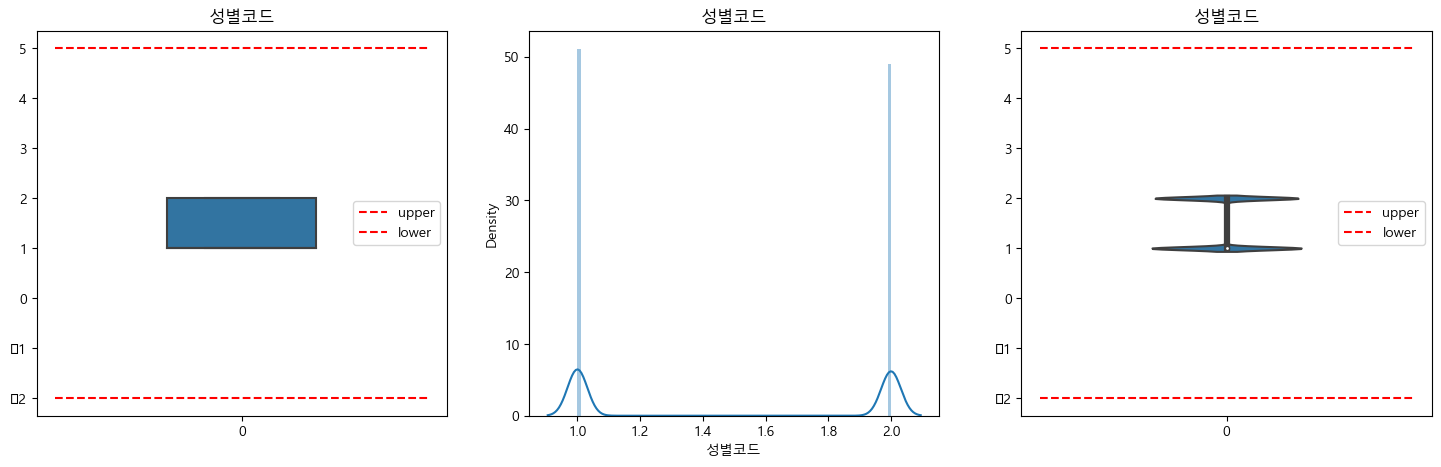

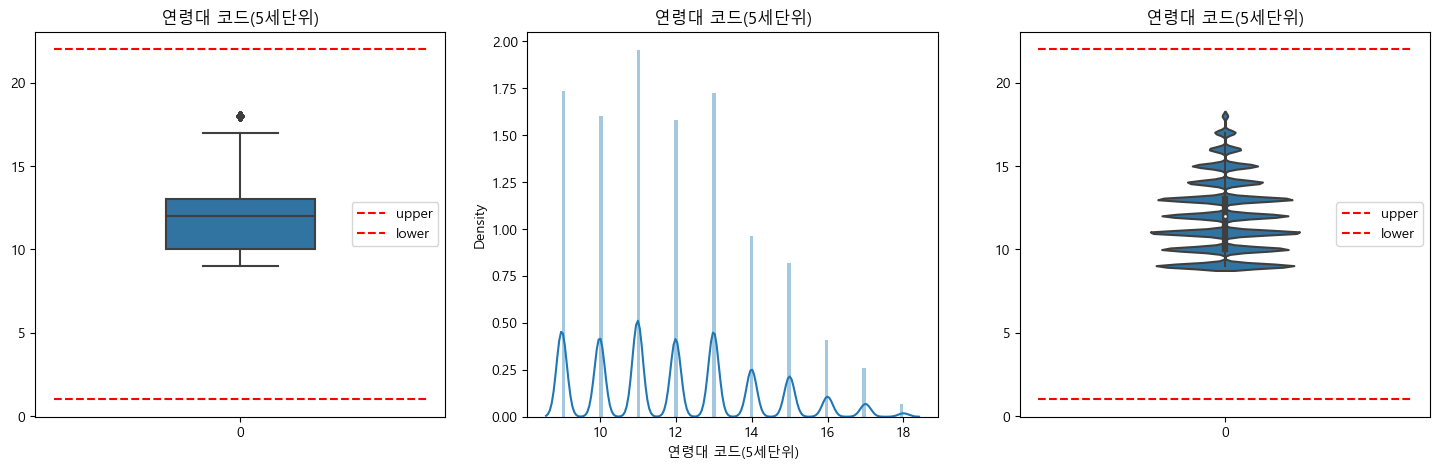

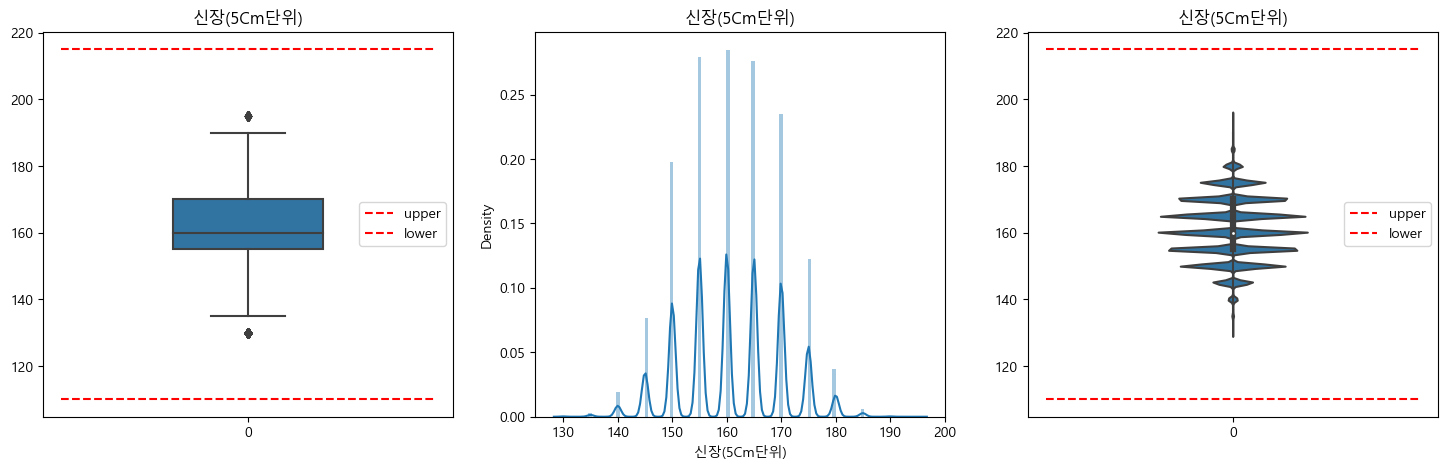

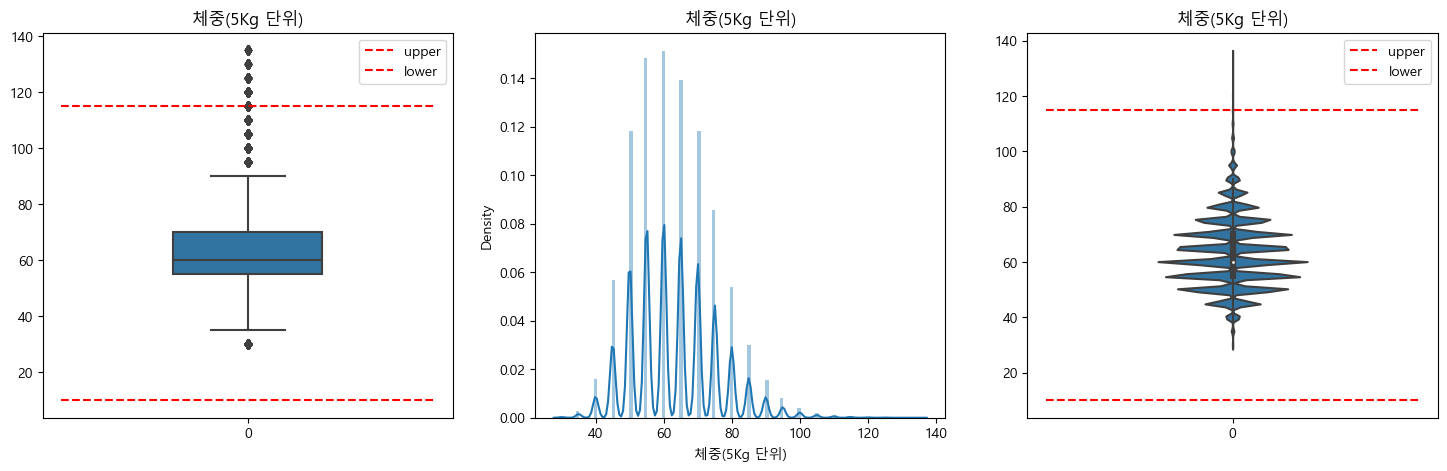

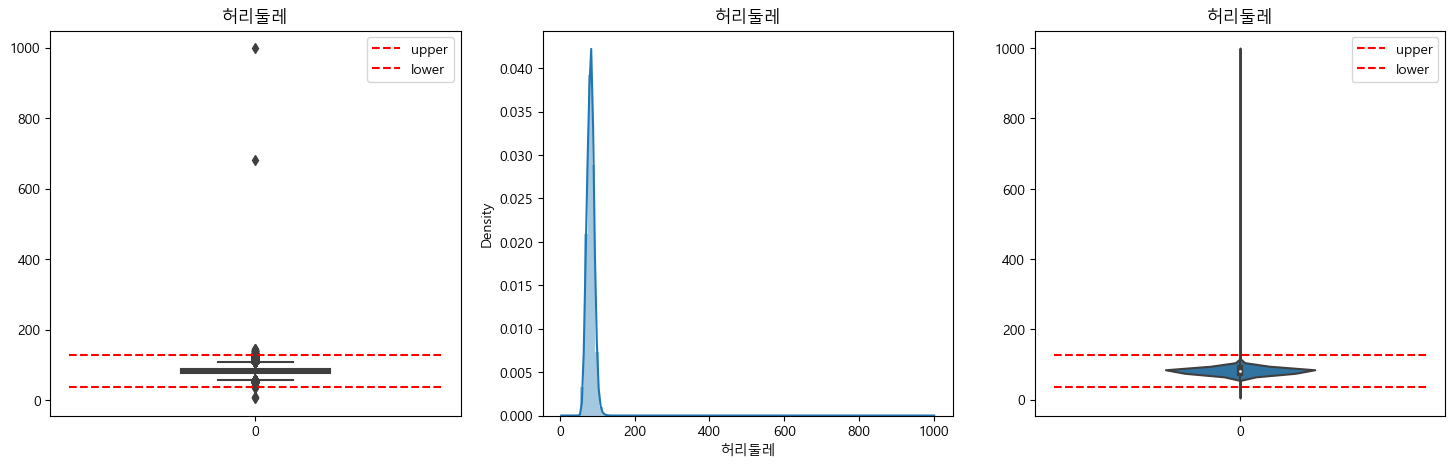

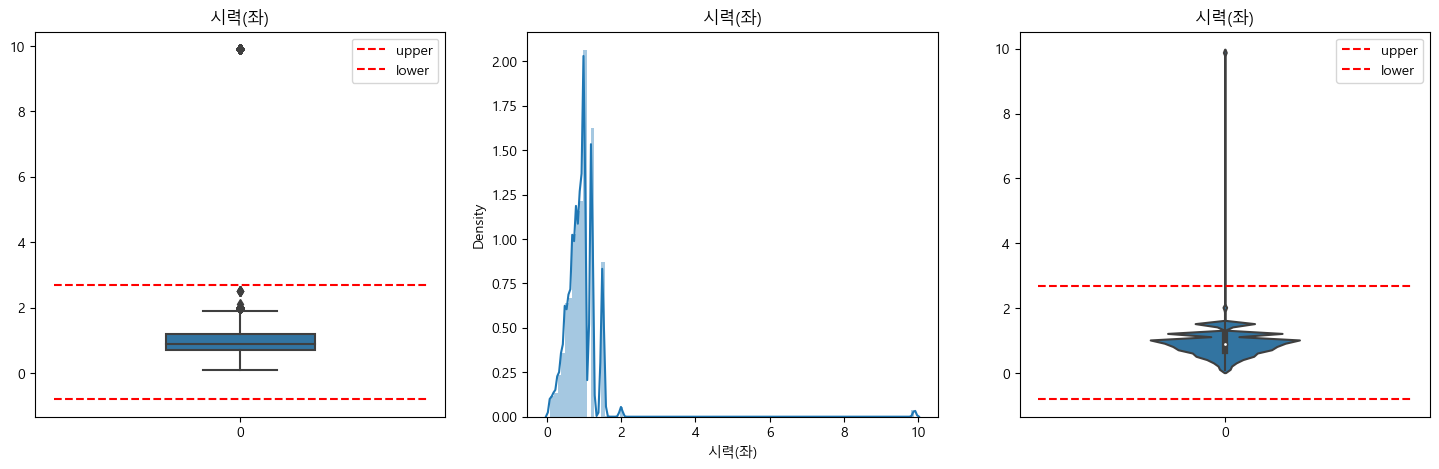

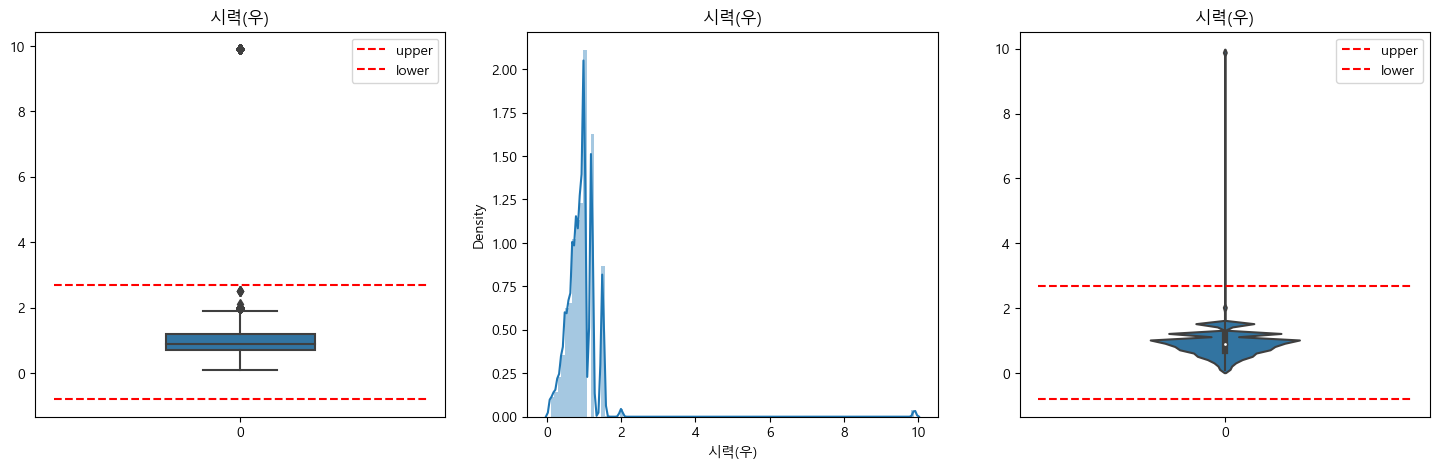

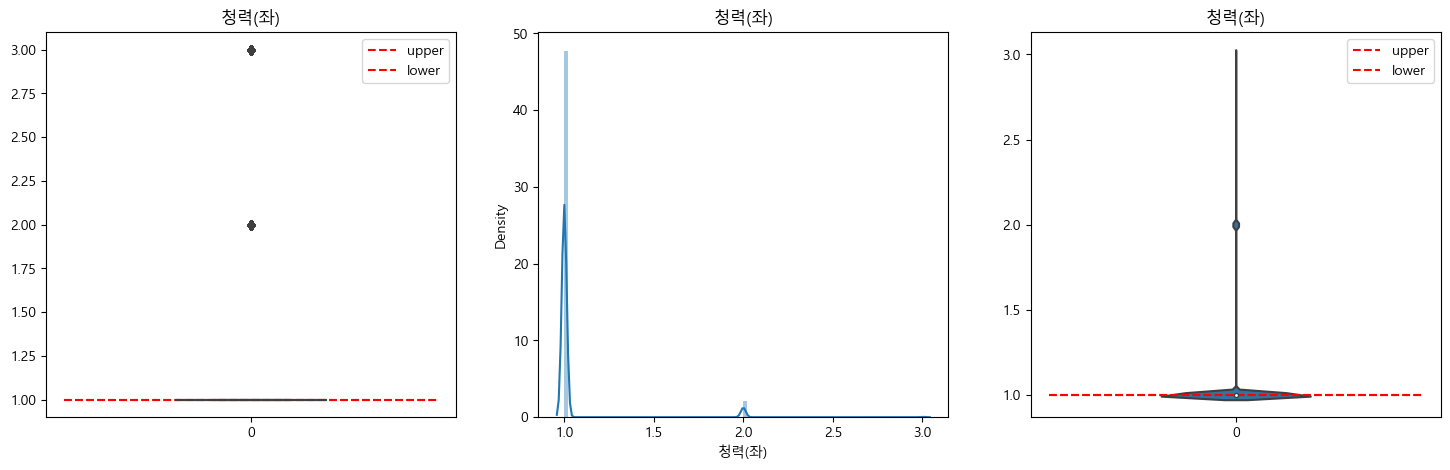

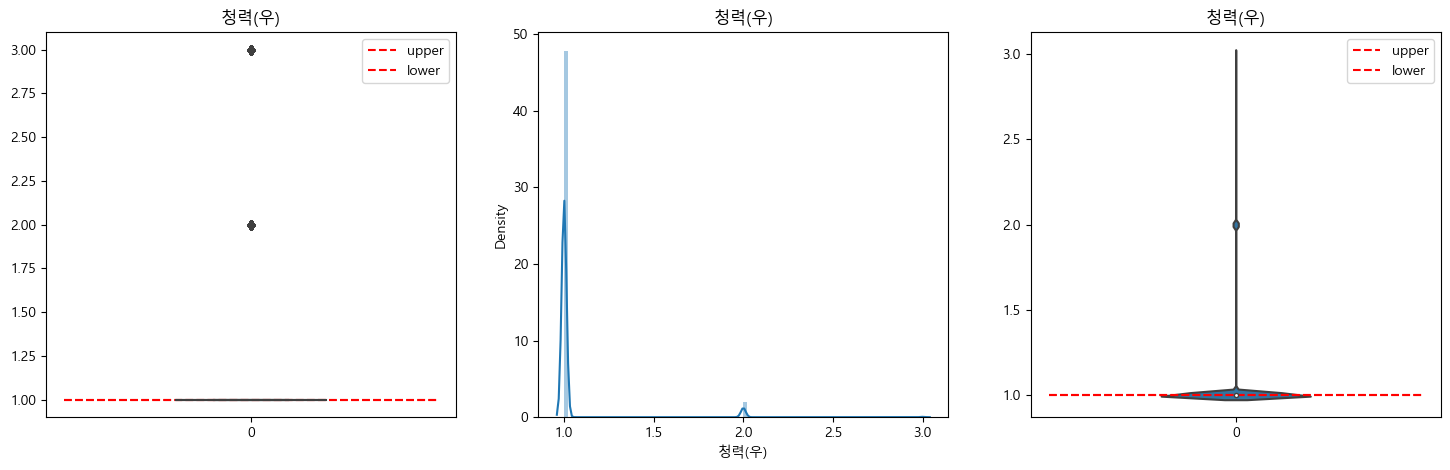

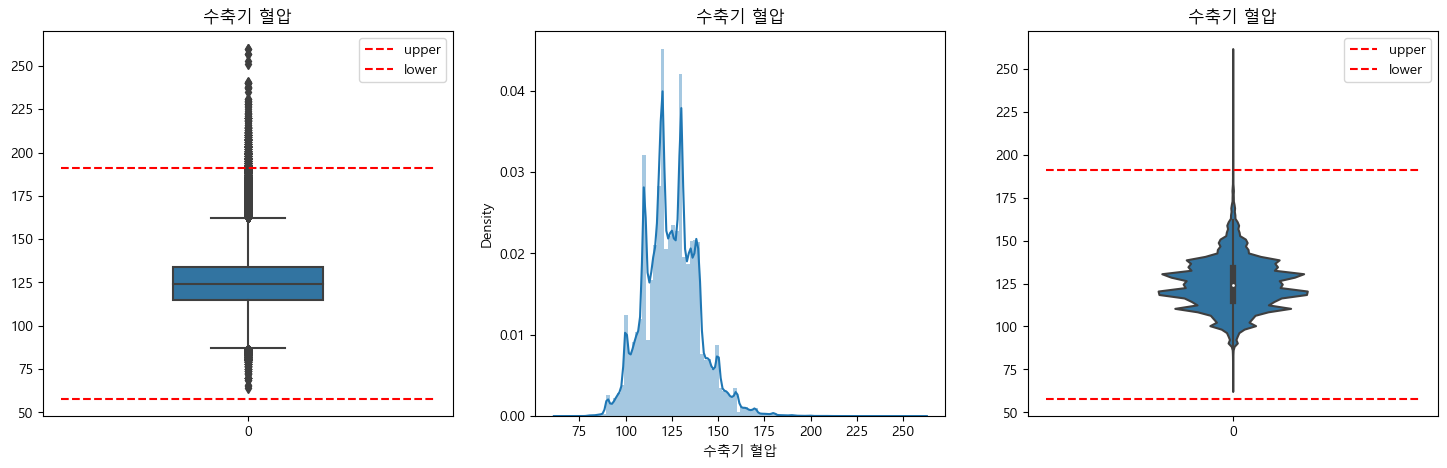

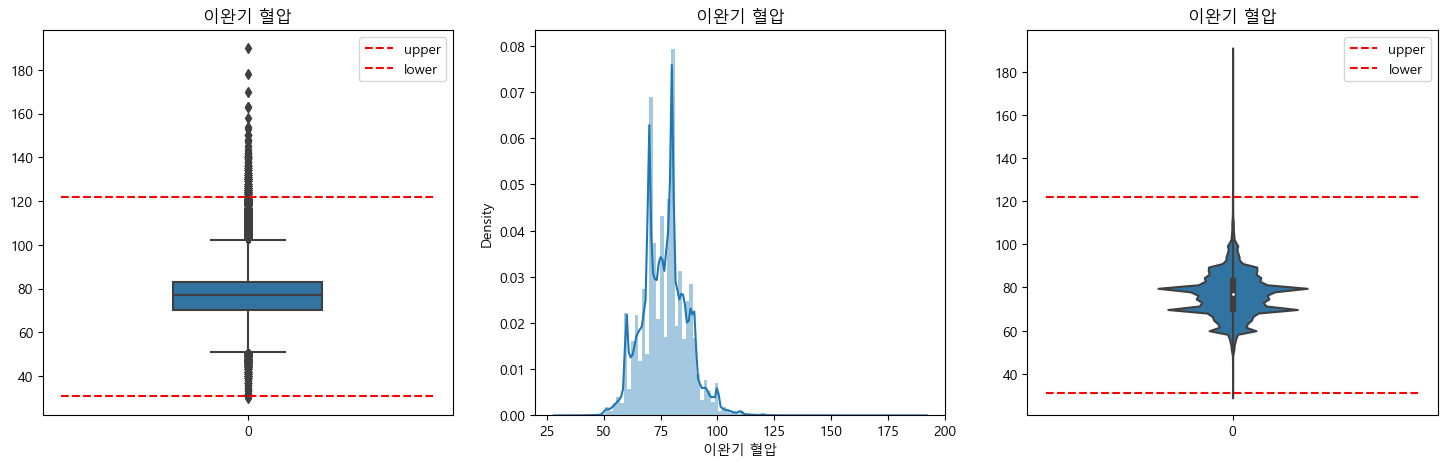

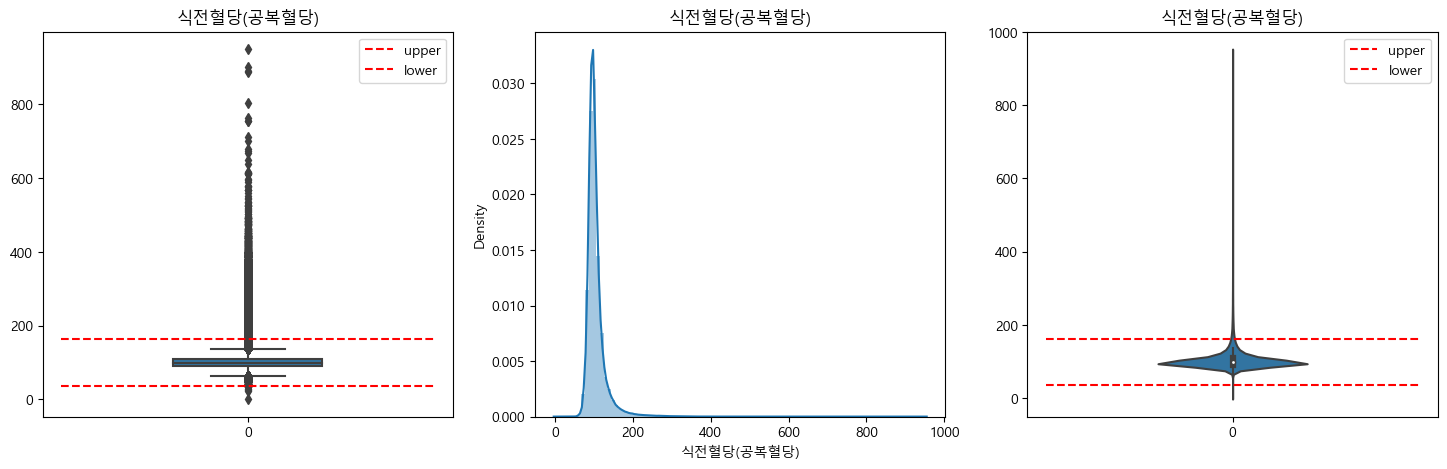

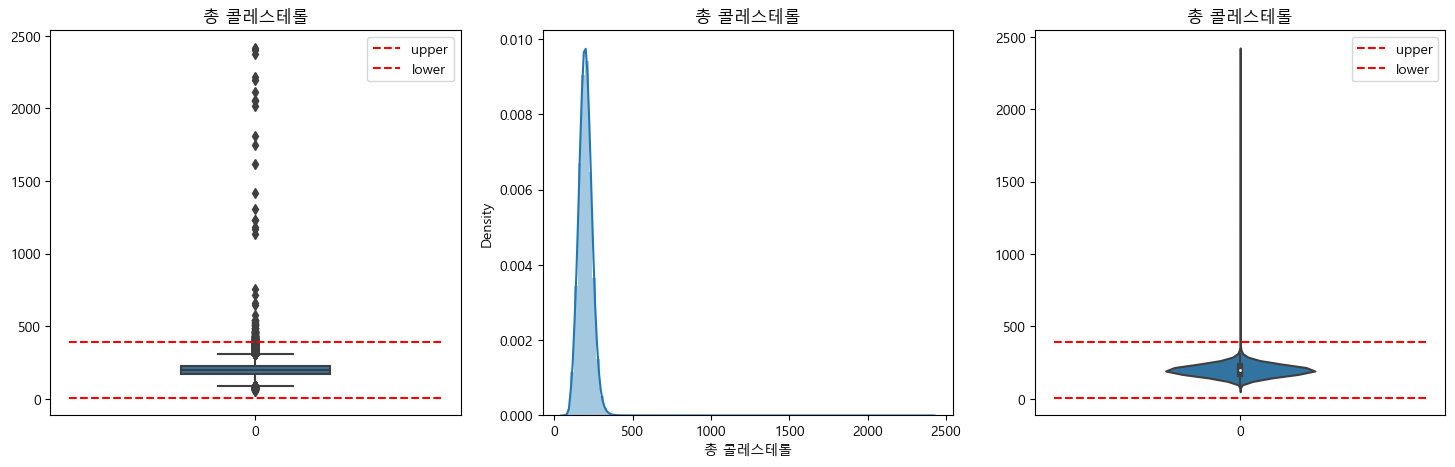

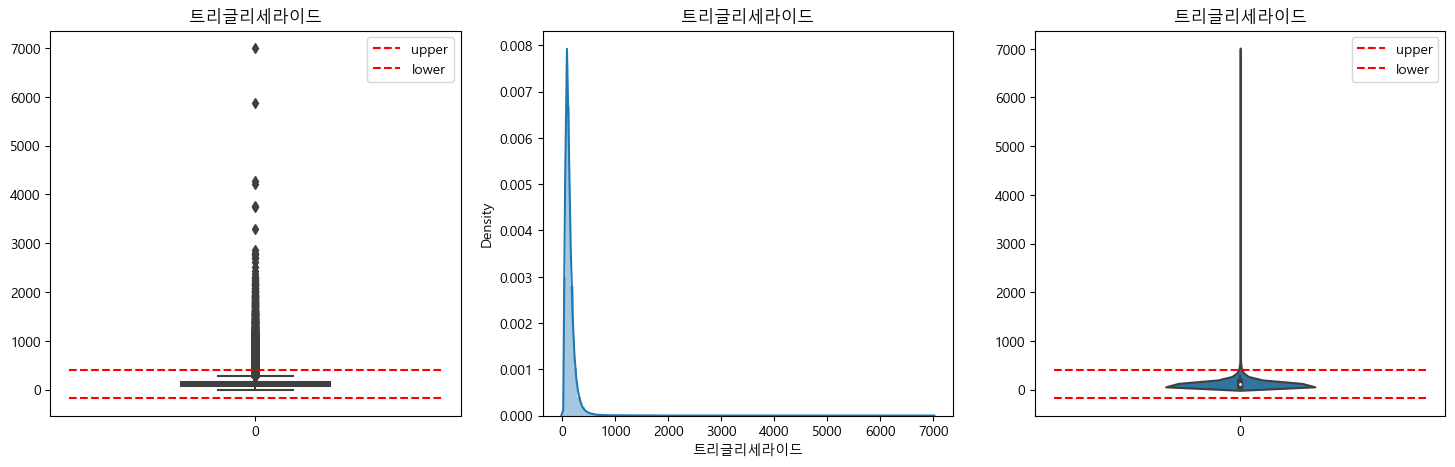

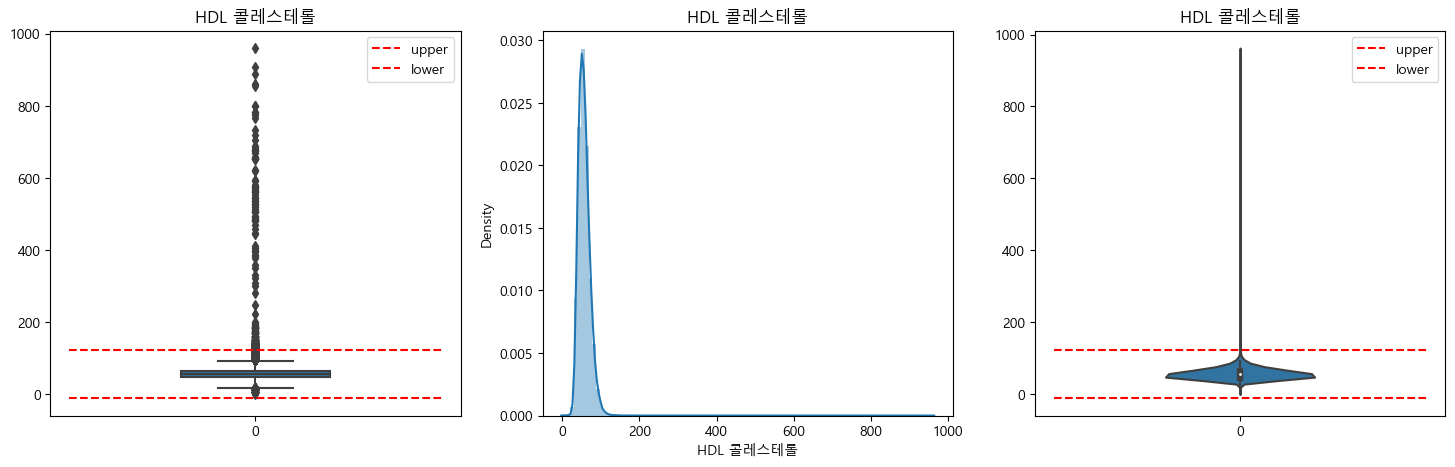

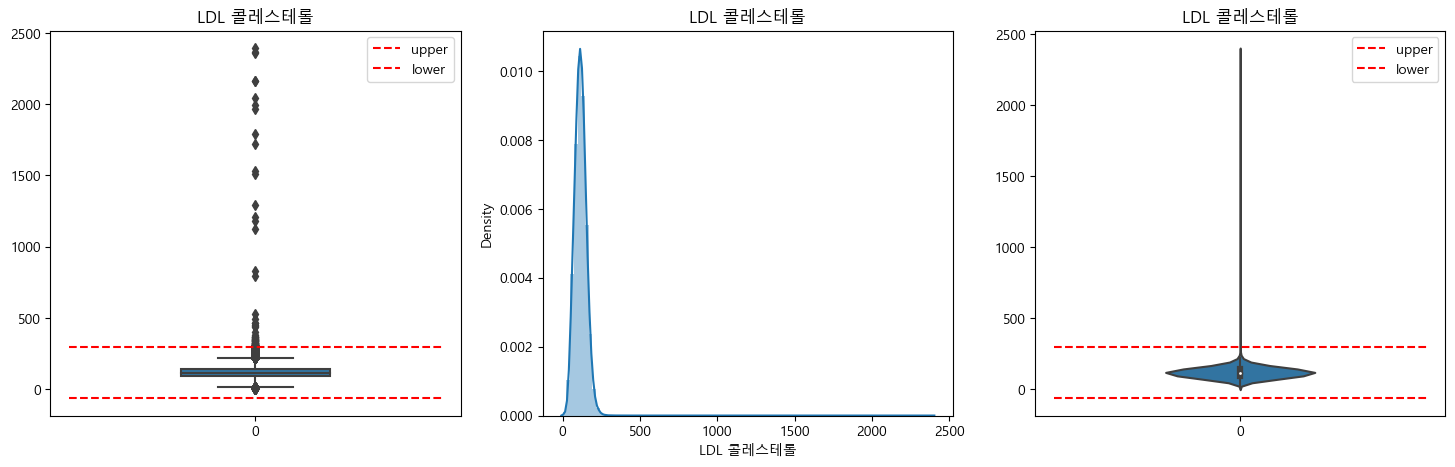

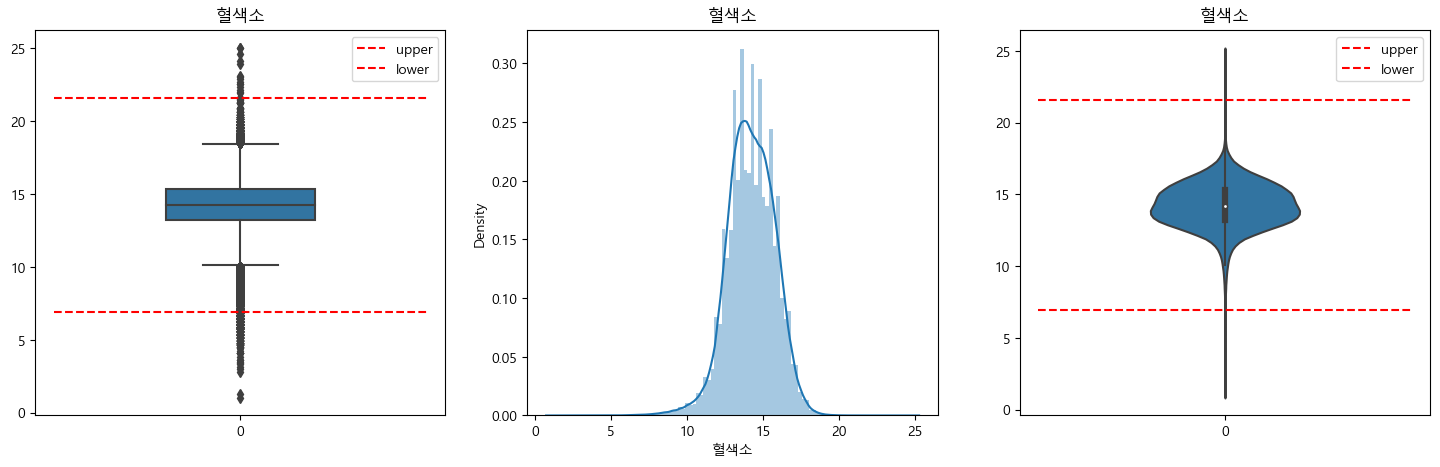

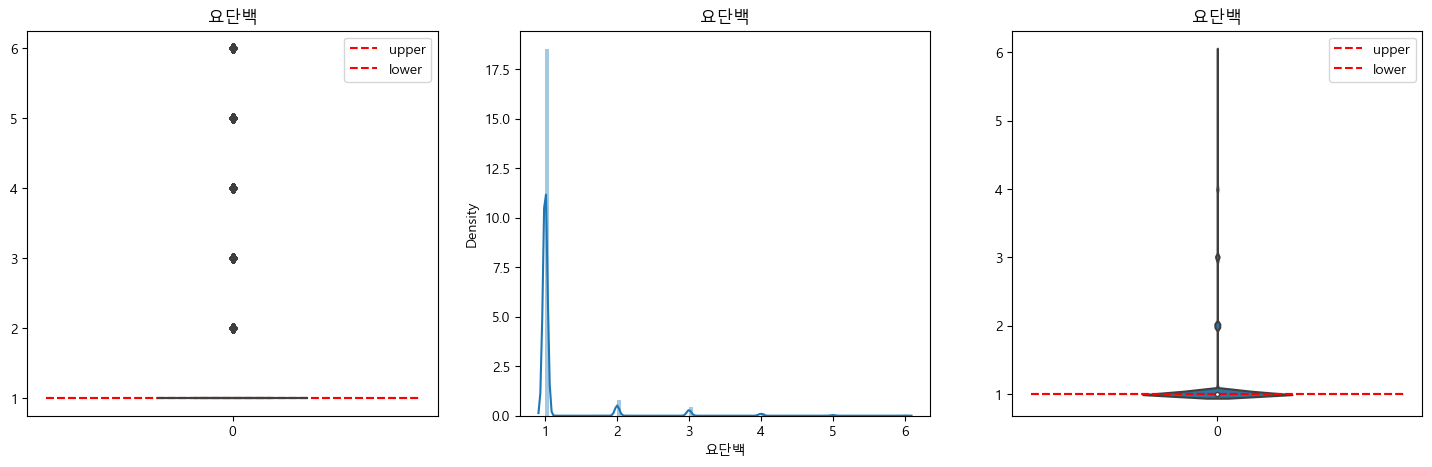

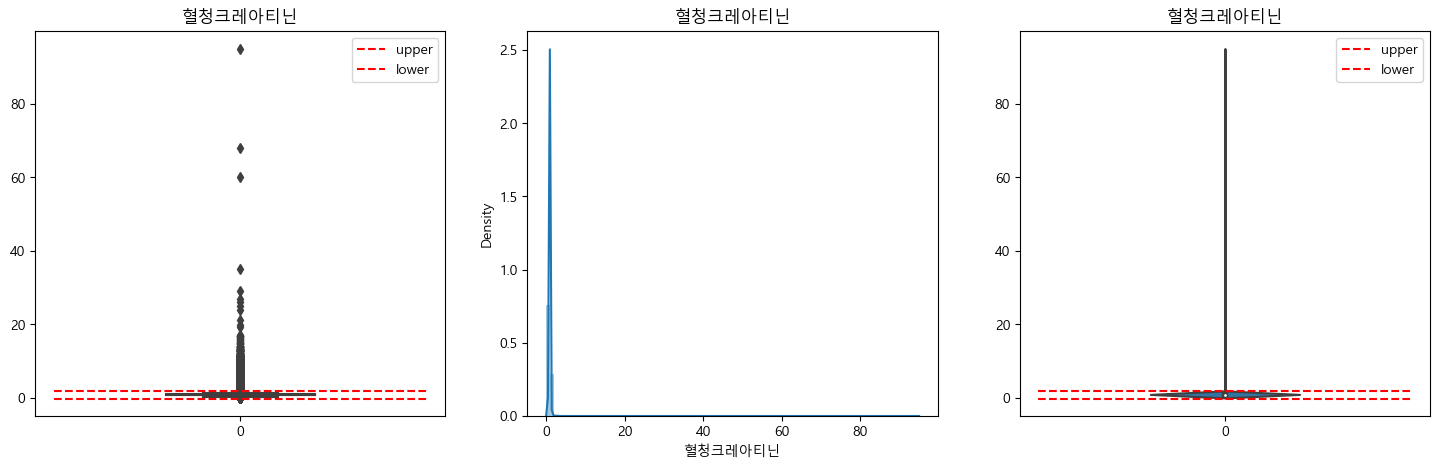

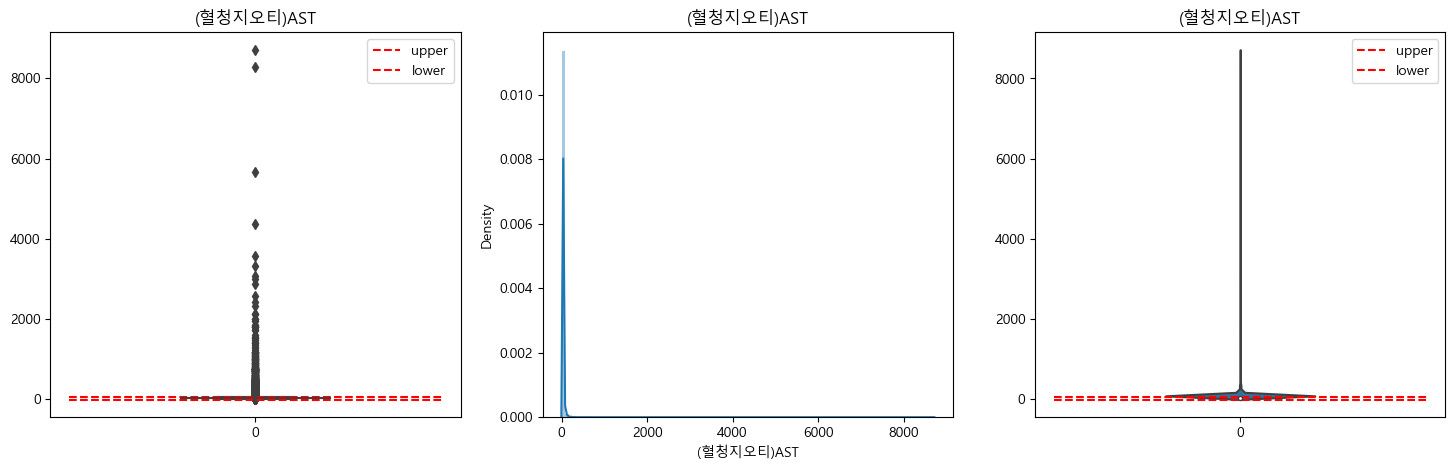

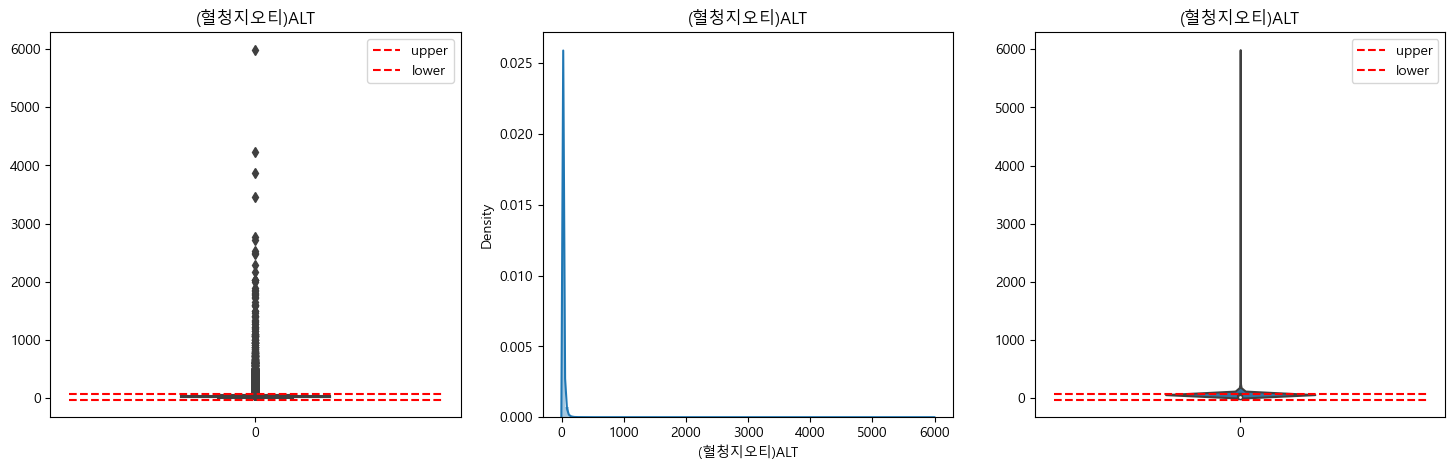

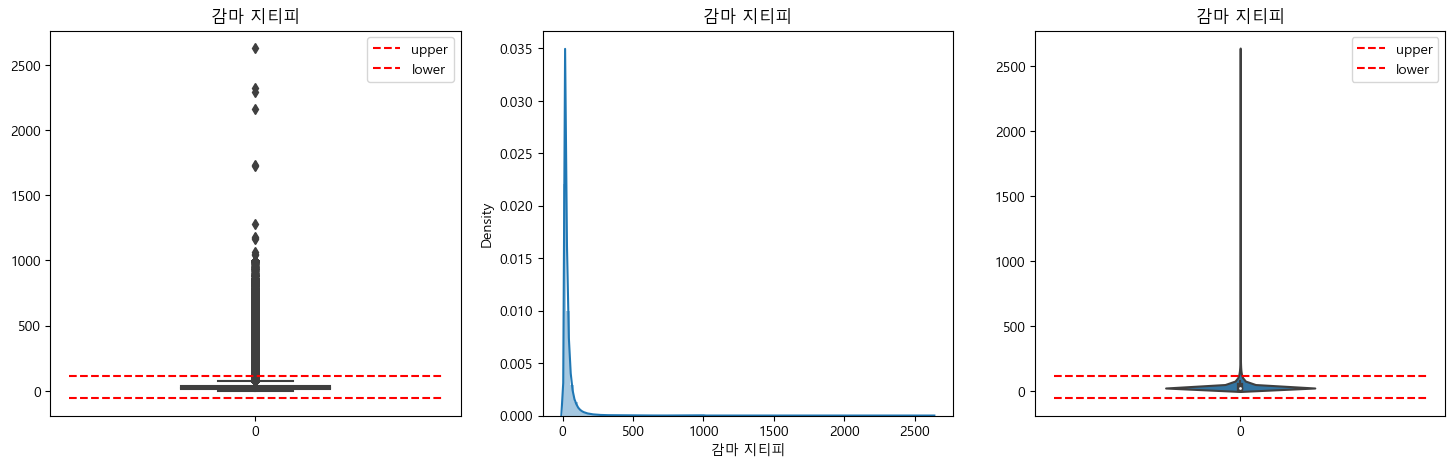

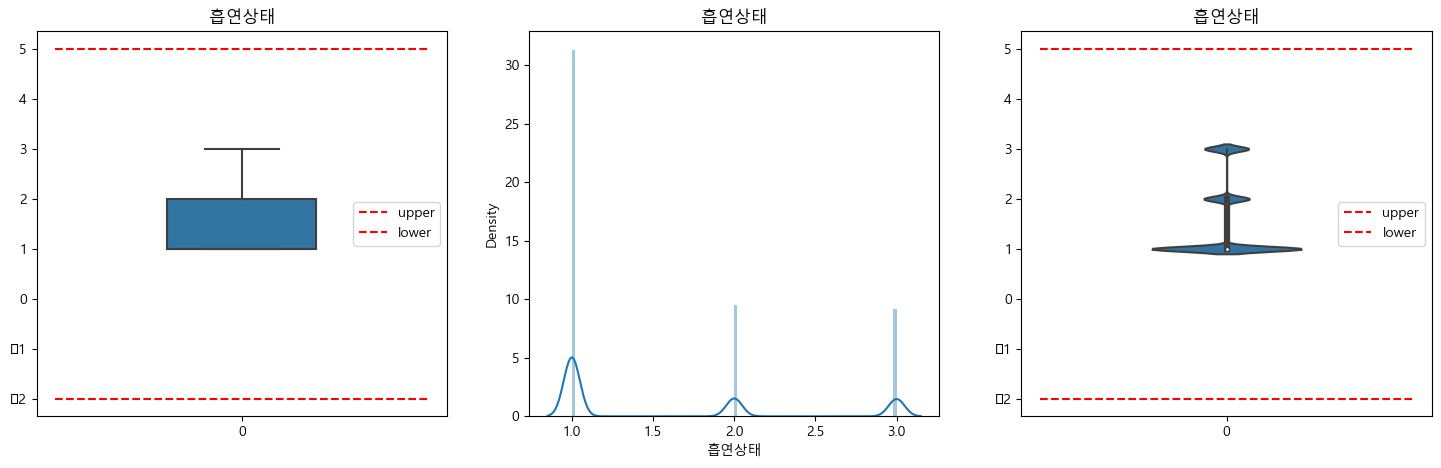

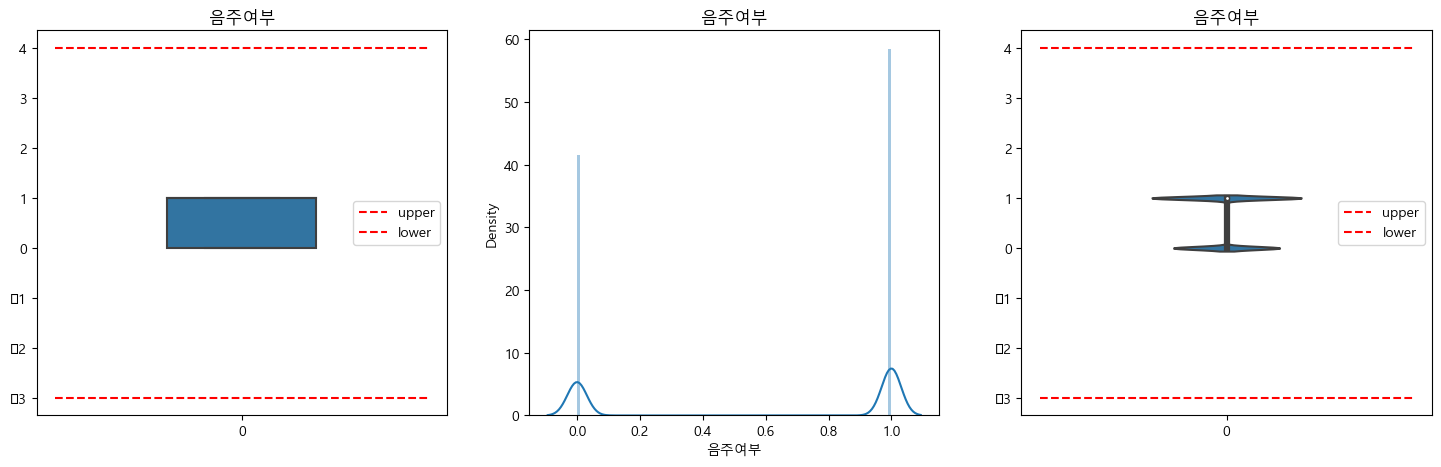

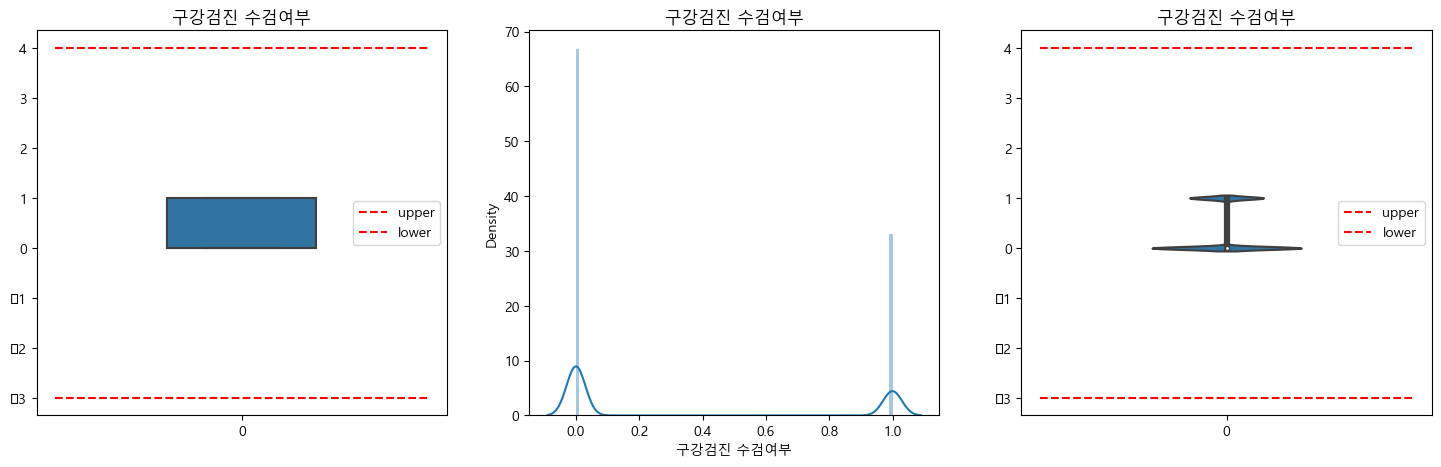

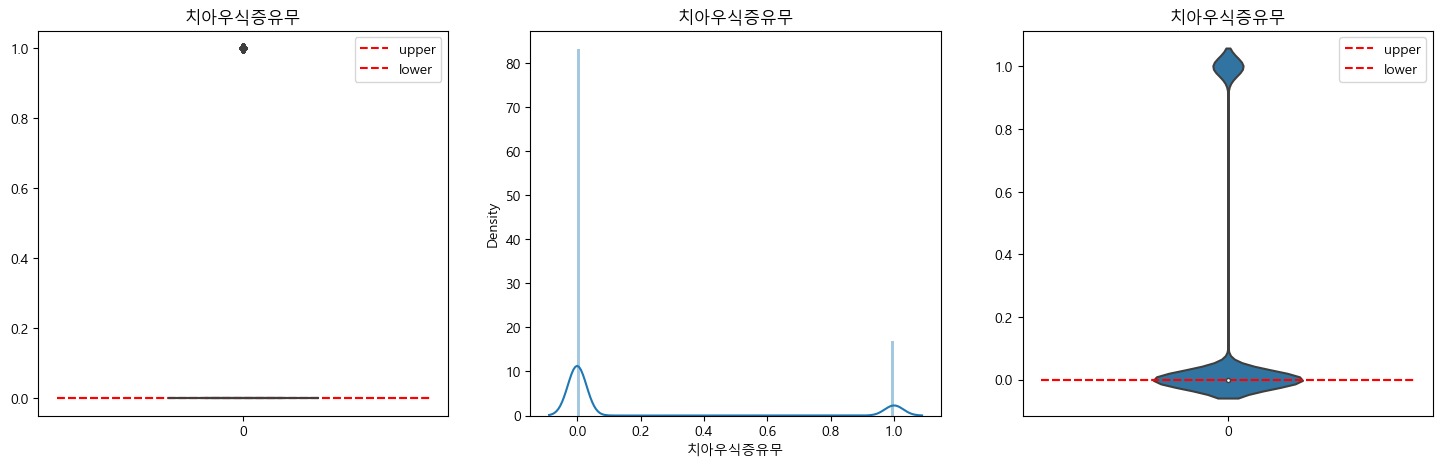

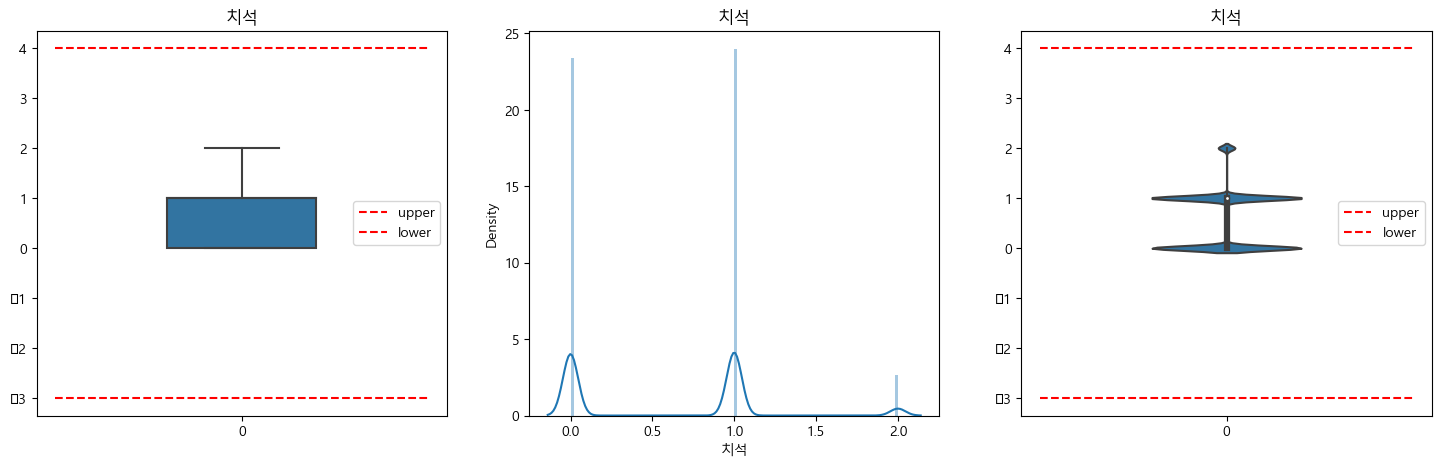

In [6]:
for col in df.columns:
    coef = 3.0
    iqr = df[col].quantile(.75)-df[col].quantile(.25)
    u = df[col].quantile(.75) + coef*iqr
    l = df[col].quantile(.25) - coef*iqr

    plt.figure(figsize=(18,5))
    plt.title(col)
    plt.subplot(1,3,1)
    sns.boxplot(df[col])
    plt.plot([-1,1],[u,u],c = 'red', linestyle = '--', label = 'upper')
    plt.plot([-1,1],[l,l],c = 'red', linestyle = '--', label = 'lower')
    plt.legend()
    plt.title(col)

    plt.subplot(1,3,2)
    sns.distplot(df[col], bins = 100) 
    plt.title(col)

    plt.subplot(1,3,3)
    sns.violinplot(df[col]) 
    plt.title(col)
    plt.plot([-1,1],[u,u],c = 'red', linestyle = '--', label = 'upper')
    plt.plot([-1,1],[l,l],c = 'red', linestyle = '--', label = 'lower')
    plt.legend()
    plt.savefig('./res/feature_distribution/'+col+'.png')
    plt.show()

# 5. 데이터 전처리

## 5.1 결측치 처리

- 일부 변수의 결측치 비율이 매우 높음 → dropna()를 한다면 88%의 데이터 손실
   - 경우의 수1: 변수의 영향력을 보기 위해 결측치가 있는 행 제거 (88% 데이터 손실)
   - 경우의 수2: 결측치가 많은 변수의 설명력과 유의성 판별 후 변수 제거 (약 20% 데이터 손실)
      - 치아 관련 변수 제거:


      결측률이 높으며 target에 대한 영향력이 매우 적음
      - 콜레스테롤 관련 변수 제거:

      결측률이 높으며 다중공선성 존재(VIF 10 이상), 회귀분석의 전제조건 위반 위험
      
      -> vif 가 10 이상인 변수는 없어도 target에 대한설명력이 크게 바뀌지 않음

***※ 결측치가 있는 행을 제거하고 결과를 본 후, 결측치가 많은 변수의 영향력을 파악하고자 한다.    변수의 영향력이 적다면 행보다 열 자체를 없애는 것이 낫다고 판단.     (target에 대한 변수의 영향력 파악 필요)***

In [7]:
# 경우의 수 1
df1 = df.dropna()
df1.reset_index(drop = True, inplace= True)
# 경우의 수 2
drop_list = ['총 콜레스테롤','트리글리세라이드','HDL 콜레스테롤','LDL 콜레스테롤' ,'구강검진 수검여부','치아우식증유무', '치석']
df2 = df.drop(columns = drop_list)
df2.dropna(inplace = True)
df2.reset_index(drop = True, inplace= True)

## 5.2 이상치 처리
- 분포에서 보았듯 너무 크거나 작은 값으로 인한 전체 데이터 왜곡이 일어남
- 어느 정도까지를 이상치라고 판별할 것인가?
   - 2.0IQR (약 3.7 시그마)에 따라 이상치 제거

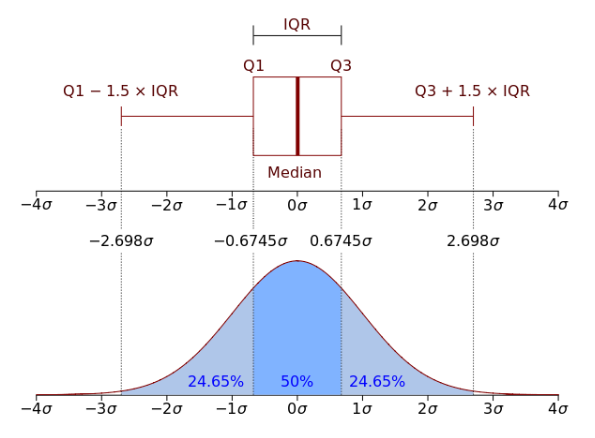


#### 이상치가 있는 컬럼
- 청력 (정상1, 비정상2 이외의 값 없애기)
- 시력 9.9값을 0으로
#### 2.0IQR 벗어나는 값 제거(약 2.7시그마)
- 시력
- 수축기 혈압
- 이완기 혈압
- 식전혈당
- 총콜레스테롤
- 트리글리세라이드
- HDL 콜레스테롤
- LDL 콜레스테롤 
- 혈색소
- 요단백
- 혈청크레아티닌
- 혈청지오티AST
- 혈청지오티ALT
- 감마 지피티

In [8]:
# 특별한 이상치 처리
idx1 = df1[(df['청력(우)'] == 3) | (df1['청력(좌)'] == 3)].index
idx2 = df2[(df['청력(우)'] == 3) | (df2['청력(좌)'] == 3)].index
df1.drop(index = idx1, inplace= True)
df2.drop(index = idx2, inplace= True)

df1.loc[(df1['시력(좌)'] == 9.9),'시력(좌)'] = 0
df1.loc[(df1['시력(우)'] == 9.9),'시력(우)'] = 0

df1.loc[(df1['요단백'] == 1),'요단백'] = 0
df1.loc[(df1['요단백'] != 0),'요단백'] = 1
df2.loc[(df2['요단백'] == 1),'요단백'] = 0
df2.loc[(df2['요단백'] != 0),'요단백'] = 1

In [9]:
# 통계적 이상치 처리

# train test split
def split_dataset(df, test_size):
    train = df[:int(len(df)*(1-test_size))]
    test = df[int(len(df)*(1-test_size)):]
    return train, test

outlier_list = ['체중(5Kg 단위)', '허리둘레', '시력(좌)',
       '시력(우)','수축기 혈압','이완기 혈압','식전혈당(공복혈당)', '총 콜레스테롤',
       '트리글리세라이드', 'HDL 콜레스테롤', 'LDL 콜레스테롤', '혈색소', '혈청크레아티닌',
       '(혈청지오티)AST','감마 지티피']

def drop_outlier(df, coef):
    for col in df.columns :
        if col in outlier_list:
            iqr = df[col].quantile(.75)-df[col].quantile(.25)
            u = df[col].quantile(.75) + coef*iqr
            l = df[col].quantile(.25) - coef*iqr
            idx = df[(df[col] > u) | (df[col] < l)].index
            df = df.drop(index = idx)
    df = df.reset_index(drop = True)
    return df


In [10]:
test_size = 0.2
train1, test1 = split_dataset(df1, test_size = test_size)
train2, test2 = split_dataset(df2, test_size = test_size)

# train1 = drop_outlier(train1, 3.0)
# train2 = drop_outlier(train2, 3.0)

## 5.3 Scaling

In [11]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

def scale_dataset(train, test):
    scaler = MinMaxScaler()
    for col in train.columns:
        train[col] = scaler.fit_transform(train[col].values.reshape(-1,1))
        test[col] = scaler.transform(test[col].values.reshape(-1,1))
    return scaler, train, test

def scale_dataset_r(train, test):
    scaler = RobustScaler()
    for col in train.columns:
        train[col] = scaler.fit_transform(train[col].values.reshape(-1,1))
        test[col] = scaler.transform(test[col].values.reshape(-1,1))
    return scaler, train, test

In [12]:
scaler1, train1, test1 = scale_dataset(train1, test1)
scaler2, train2, test2 = scale_dataset(train2, test2)

In [13]:
def make_Xy(train, test):
    X_train = train.drop(columns = ['(혈청지오티)ALT'])
    y_train = train['(혈청지오티)ALT']
    X_test = test.drop(columns = ['(혈청지오티)ALT'])
    y_test = test['(혈청지오티)ALT']
    return X_train, y_train, X_test, y_test

In [14]:
X_train1, y_train1, X_test1, y_test1 = make_Xy(train1, test1)
X_train2, y_train2, X_test2, y_test2 = make_Xy(train2, test2)

# 6. 분석

## 6.1 상관관계 파악
- 상관관계 파악

<AxesSubplot: >

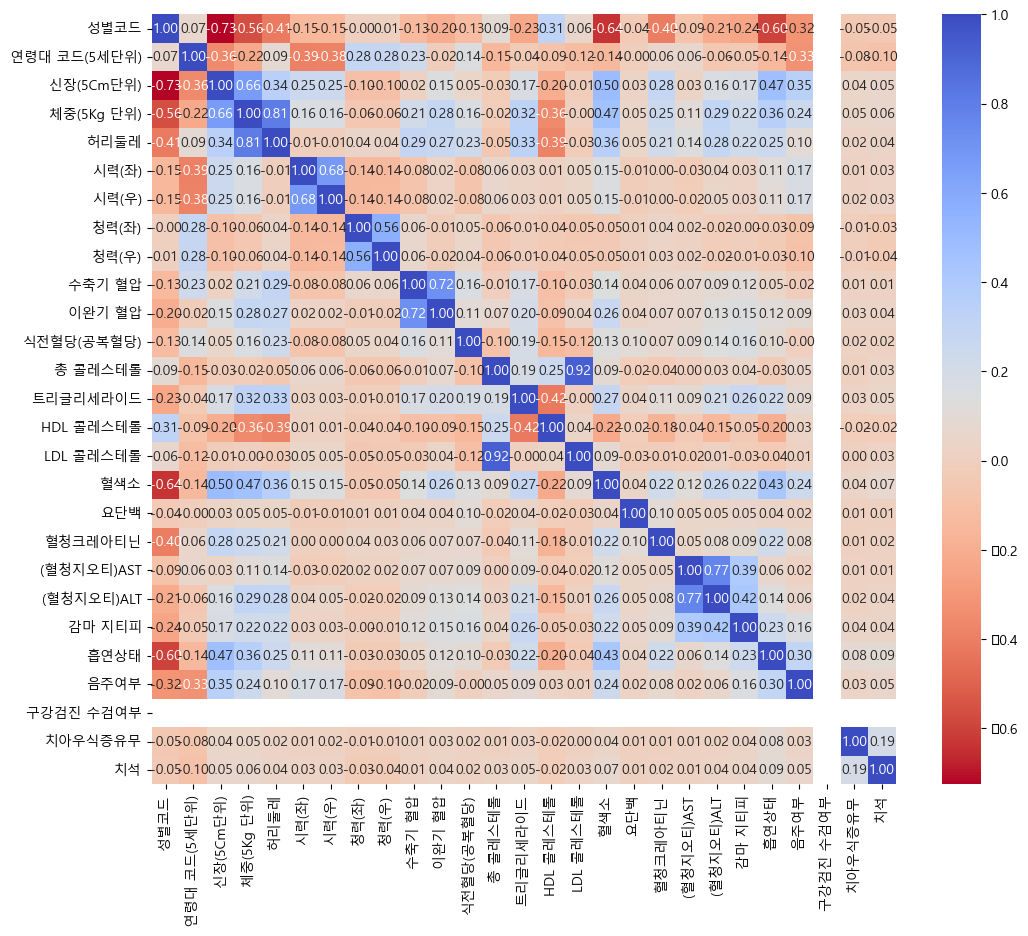

In [15]:
corr1 = train1.corr()
plt.figure(figsize = (12,10))
sns.heatmap(corr1, cmap='coolwarm_r', annot_kws={'size':10}, annot = True, fmt = '.2f')
# plt.savefig('./res/1/heatmap.png')

<AxesSubplot: >

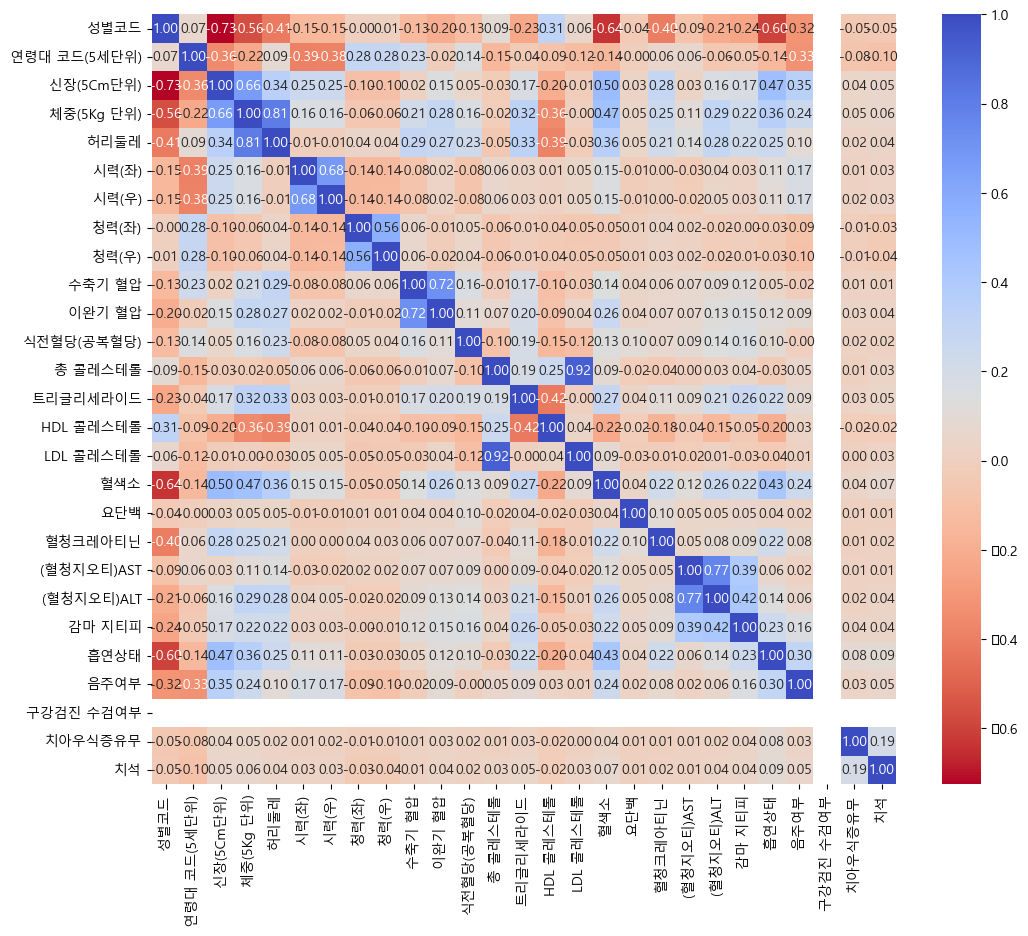

In [16]:
corr2 = train1.corr()
plt.figure(figsize = (12,10))
sns.heatmap(corr2, cmap='coolwarm_r', annot_kws={'size':10}, annot = True, fmt = '.2f')
# plt.savefig('./res/1/heatmap.png')

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def show_vif(train):
    vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(train.values, i) for i in range(train.shape[1])]
    vif["features"] = train.columns 
    print(vif)

show_vif(X_train1)
show_vif(X_train2)

    VIF Factor      features
0     5.143879          성별코드
1     4.590059  연령대 코드(5세단위)
2    39.940809     신장(5Cm단위)
3    52.832056    체중(5Kg 단위)
4    51.135676          허리둘레
5    17.354966         시력(좌)
6    17.413817         시력(우)
7     1.598957         청력(좌)
8     1.590165         청력(우)
9    35.922681        수축기 혈압
10   48.052903        이완기 혈압
11    9.637730    식전혈당(공복혈당)
12  412.555991       총 콜레스테롤
13   19.976502      트리글리세라이드
14   63.242430     HDL 콜레스테롤
15  309.495680     LDL 콜레스테롤
16   67.374743           혈색소
17    1.092261           요단백
18    9.896056       혈청크레아티닌
19    3.517060    (혈청지오티)AST
20    2.199984        감마 지티피
21    2.554058          흡연상태
22    3.342554          음주여부
23         NaN     구강검진 수검여부
24    1.260938       치아우식증유무
25    2.094232            치석
    VIF Factor      features
0     4.352305          성별코드
1     5.083482  연령대 코드(5세단위)
2    31.720364     신장(5Cm단위)
3    34.005704    체중(5Kg 단위)
4   157.952750          허리둘레
5     3.053479         시력(좌)
6     3.043463

In [18]:
vif_columns = ['신장(5Cm단위)','허리둘레', '시력(우)', '청력(우)', '수축기 혈압', '총 콜레스테롤', 'LDL 콜레스테롤','치석']
for col in vif_columns:
    if col in X_train1.columns:
        X_train1 = X_train1.drop(columns = [col])
        X_test1 = X_test1.drop(columns = [col])
    if col in X_train2.columns:
        X_train2 = X_train2.drop(columns = [col])
        X_test2 = X_test2.drop(columns = [col])

In [19]:
show_vif(X_train1)
show_vif(X_train2)

    VIF Factor      features
0     3.701962          성별코드
1     3.360780  연령대 코드(5세단위)
2    14.353402    체중(5Kg 단위)
3    10.039412         시력(좌)
4     1.154833         청력(좌)
5    22.625600        이완기 혈압
6     9.398773    식전혈당(공복혈당)
7     5.611600      트리글리세라이드
8    16.634647     HDL 콜레스테롤
9    49.302636           혈색소
10    1.091141           요단백
11    9.454582       혈청크레아티닌
12    3.513832    (혈청지오티)AST
13    2.179401        감마 지티피
14    2.523643          흡연상태
15    3.317954          음주여부
16         NaN     구강검진 수검여부
17    1.216904       치아우식증유무
    VIF Factor      features
0     3.039566          성별코드
1     3.452717  연령대 코드(5세단위)
2    13.423931    체중(5Kg 단위)
3     2.832867         시력(좌)
4     1.097913         청력(좌)
5    24.749171        이완기 혈압
6    11.405057    식전혈당(공복혈당)
7    44.953522           혈색소
8     1.099833           요단백
9     7.044987       혈청크레아티닌
10    2.225283    (혈청지오티)AST
11    1.828922        감마 지티피
12    2.465378          흡연상태
13    3.058344          음주여부


- X와 y의 상관관계를 알아보기 위한 Scatter plot

In [20]:
# for col in train1.columns:
#     plt.scatter(train1[col],train1['(혈청지오티)ALT'], s = 6)
#     plt.title('상관계수: '+str(corr1['(혈청지오티)ALT'][col]))
#     plt.xlabel(col)
#     plt.ylabel('(혈청지오티)ALT')
#     plt.savefig('./res/1/scatter/'+col+'.png')
#     plt.show()

In [21]:
# for col in train2.columns:
#     plt.scatter(train2[col],train2['(혈청지오티)ALT'], s = 6)
#     plt.title('상관계수: '+str(corr2['(혈청지오티)ALT'][col]))
#     plt.xlabel(col)
#     plt.ylabel('(혈청지오티)ALT')
#     plt.savefig('./res/2/scatter/'+col+'.png')
#     plt.show()

## 6.2 간단한 모델 빌드

- 선형회귀모델 OLS검정

In [22]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from math import sqrt
import random
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

In [23]:
model1 = sm.OLS(y_train1,X_train1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             (혈청지오티)ALT   R-squared (uncentered):                   0.855
Model:                            OLS   Adj. R-squared (uncentered):              0.855
Method:                 Least Squares   F-statistic:                          3.470e+04
Date:                Mon, 06 Feb 2023   Prob (F-statistic):                        0.00
Time:                        09:48:01   Log-Likelihood:                      3.5616e+05
No. Observations:              100209   AIC:                                 -7.123e+05
Df Residuals:                  100192   BIC:                                 -7.121e+05
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
성별코드            -0.0009   6.07e-05    -15.620      0.000      -0.001      -0.001
연령대 코드(5세단위)    -0.0047      0.000    -44.027      0.000      -0.005      -0.004
체중(5Kg 단위)       0.0117      0.000     47.874      0.000       0.011       0.012
시력(좌)           -0.0009      0.000     -5.977      0.000      -0.001      -0.001
청력(좌)           -0.0003   9.92e-05     -3.151      0.002      -0.001      -0.000
이완기 혈압          -0.0017      0.000     -6.556      0.000      -0.002      -0.001
식전혈당(공복혈당)       0.0055      0.000     12.159      0.000       0.005       0.006
트리글리세라이드         0.0022      0.000     15.087      0.000       0.002       0.003
HDL 콜레스테롤       -0.0300      0.001    -32.974      0.000      -0.032      -0.028
혈색소              0.0078      0.000     24.805      0.000       0.007       0.008
요단백          -1.336e-05   8.98e-05     -0.149      0.882      -0.000       0.000
혈청크레아티닌         -0.0267      0.002    -14.054      0.000      -0.030      -0.023
(혈청지오티)AST       0.7722      0.002    350.395      0.000       0.768       0.777
감마 지티피           0.0393      0.001     39.896      0.000       0.037       0.041
흡연상태            -0.0009   7.23e-05    -12.939      0.000      -0.001      -0.001
음주여부            -0.0010   5.07e-05    -19.659      0.000      -0.001      -0.001
구강검진 수검여부             0          0        nan        nan           0           0
치아우식증유무         -0.0003   5.87e-05     -4.378      0.000      -0.000      -0.000
==============================================================================
Omnibus:                   112916.792   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       2452281834.154
Skew:                           4.214   Prob(JB):                         0.00
Kurtosis:                     769.322   Cond. No.                          inf
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# 해석
### 1) 회귀모형은 타당한가?
- H0 귀무가설: 회귀모형은 타당하지 않다.
- H1 대립가설: 회귀모형은 타당하다
#### 결과
- Prob(F-statistics) = 0.000
- 유의확률이P 0.000이므로 유의수준 0.05에서 회귀모형은 통계적으로 유의하게 타당한 것으로 나타났다.

### 2) X는 Y에게 유의한 영향을 주는가?
- 귀무가설: X는 Y에게 영향을 주지 않는다.
- 대립가설: X는 Y에게 영향을 준다.

#### 결과
- 시력(좌), 청력(좌), 수축기 혈압, 요단백의 target에 대한 영향은 통계적으로 유의하지 않다. (영향을 주는지 안주는지 모른다)
- 이외의 변수에 대한 회귀계수 는 유의수준 0.05에서 통계적으로 유의하다.
- 회귀 계수의 값이 큰 변수들은 Y에게 많은 영향을 준다.
- 회귀 계수의 값이 작은 변수들은 Y에게 적은 영향을 준다.

In [24]:
model2 = sm.OLS(y_train2,X_train2).fit()
print(model2.summary())

                                 OLS Regression Results                                
Dep. Variable:             (혈청지오티)ALT   R-squared (uncentered):                   0.796
Model:                            OLS   Adj. R-squared (uncentered):              0.796
Method:                 Least Squares   F-statistic:                          2.199e+05
Date:                Mon, 06 Feb 2023   Prob (F-statistic):                        0.00
Time:                        09:48:02   Log-Likelihood:                      3.5137e+06
No. Observations:              787045   AIC:                                 -7.027e+06
Df Residuals:                  787031   BIC:                                 -7.027e+06
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

# 해석
### 1) 회귀모형은 타당한가?
- H0 귀무가설: 회귀모형은 타당하지 않다.
- H1 대립가설: 회귀모형은 타당하다
#### 결과
- Prob(F-statistics) = 0.000
- 유의확률이 0.000이므로 유의수준 0.05에서 회귀모형은 통계적으로 유의하게 타당한 것으로 나타났다.

### 2) X는 Y에게 유의한 영향을 주는가?
- 귀무가설: X는 Y에게 영향을 주지 않는다.
- 대립가설: X는 Y에게 영향을 준다.

#### 결과

- 회귀 계수의 값이 큰 변수들은 Y에게 많은 영향을 준다.
- 회귀 계수의 값이 작은 변수들은 Y에게 적은 영향을 준다.

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def evaluation_matrix(X_test, y_test, model):
    print('Evaluation Matrix')
    print('MSE:  ', mean_squared_error(y_test, model.predict(X_test)))
    print('RMSE: ', sqrt(mean_squared_error(y_test, model.predict(X_test))))
    print('MAE:  ', mean_absolute_error(y_test, model.predict(X_test)))



In [26]:
evaluation_matrix(X_test1, y_test1, model1)
evaluation_matrix(X_test2, y_test2, model2)

Evaluation Matrix
MSE:   4.670115550809057e-05
RMSE:  0.006833824369128209
MAE:   0.003593079832366292
Evaluation Matrix
MSE:   6.489048788340373e-06
RMSE:  0.0025473611421116507
MAE:   0.00124162462431597


In [27]:
def show_prediction(X_test,y_test, model, scaler, scale):
    scale = scale
    actual = scaler.inverse_transform(np.array(y_test).reshape(-1,1))
    predict = scaler.inverse_transform(np.array(model.predict(X_test)).reshape(-1,1))
    plt.figure(figsize = (18,5))
    plt.plot(actual[:scale], label = 'actual')
    plt.plot(predict[:scale], label = 'predict')
    plt.ylabel('(혈청지오티)ALT')
    plt.legend()
    plt.show()

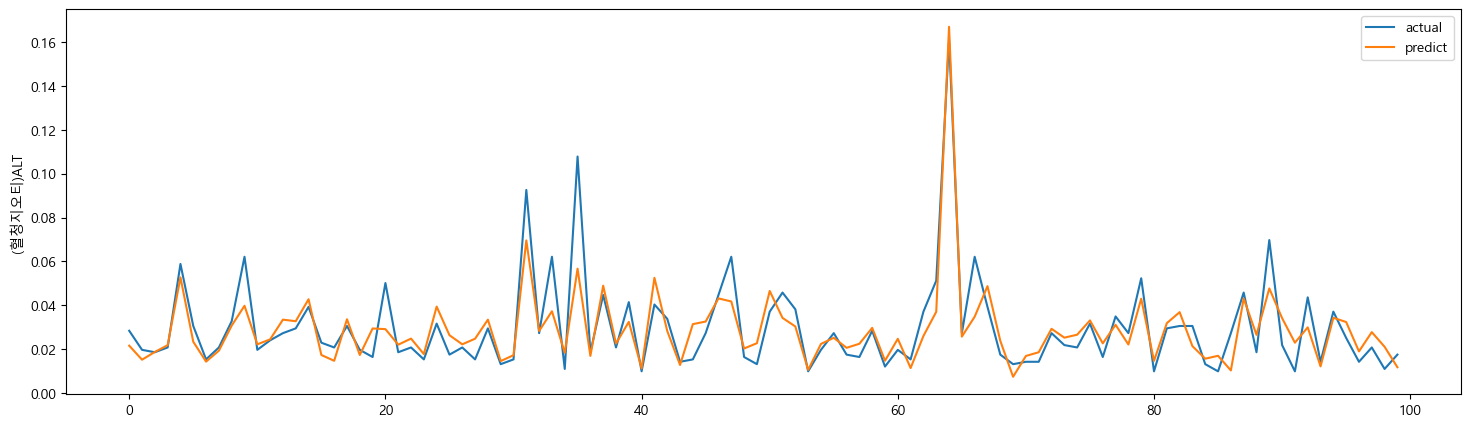

In [28]:
show_prediction(X_test1, y_test1, model1, scaler1,100)

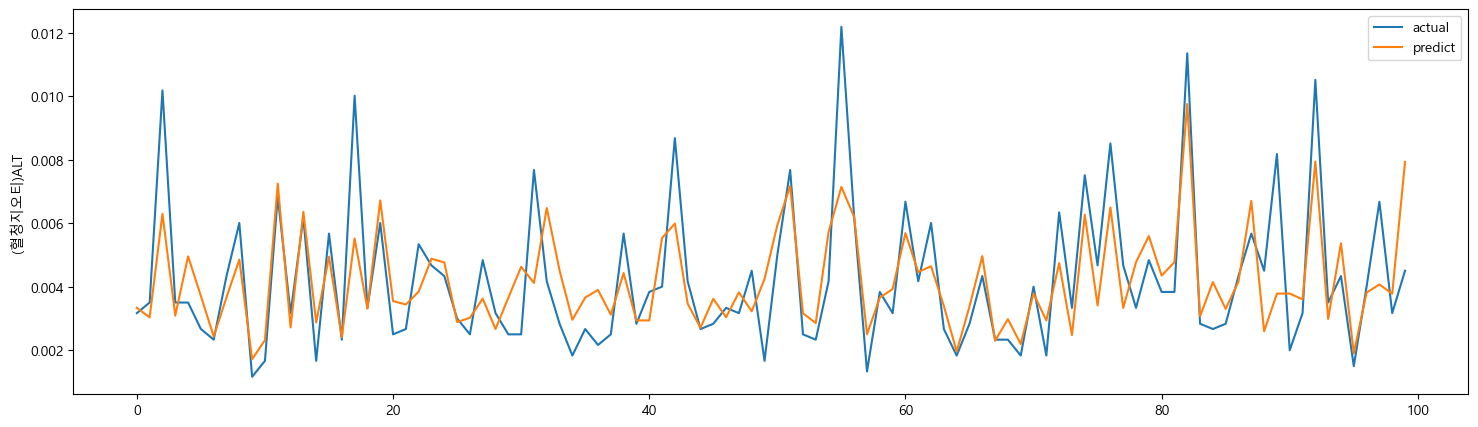

In [29]:
show_prediction(X_test2, y_test2, model2, scaler2,100)

- XGBOOST 모델

In [30]:
import xgboost
# xgb_model1 = xgboost.XGBRegressor(
#     n_estimators = 100,
#     learning_rate = 0.08,
#     subsample = 0.75,
#     colsample_bytree = 1,
#     max_depth = 7
# )
# xgb_model2 = xgboost.XGBRegressor(
#     n_estimators = 100,
#     learning_rate = 0.08,
#     subsample = 0.75,
#     colsample_bytree = 1,
#     max_depth = 7
# )

# xgb_model1.fit(X_train1,y_train1)
# xgb_model2.fit(X_train2,y_train2)

In [31]:
X_train1.columns

Index(['성별코드', '연령대 코드(5세단위)', '체중(5Kg 단위)', '시력(좌)', '청력(좌)', '이완기 혈압',
       '식전혈당(공복혈당)', '트리글리세라이드', 'HDL 콜레스테롤', '혈색소', '요단백', '혈청크레아티닌',
       '(혈청지오티)AST', '감마 지티피', '흡연상태', '음주여부', '구강검진 수검여부', '치아우식증유무'],
      dtype='object')

In [32]:
def build_XGB_model(X_train,y_train):
    xgb_model = xgboost.XGBRegressor(
    n_estimators = 100,
    learning_rate = 0.08,
    subsample = 0.75,
    colsample_bytree = 1,
    max_depth = 7
    )

    xgb_model.fit(X_train,y_train)

    return xgb_model

In [33]:
xgb_model1 = build_XGB_model(X_train1,y_train1)
xgb_model2 = build_XGB_model(X_train2,y_train2)

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

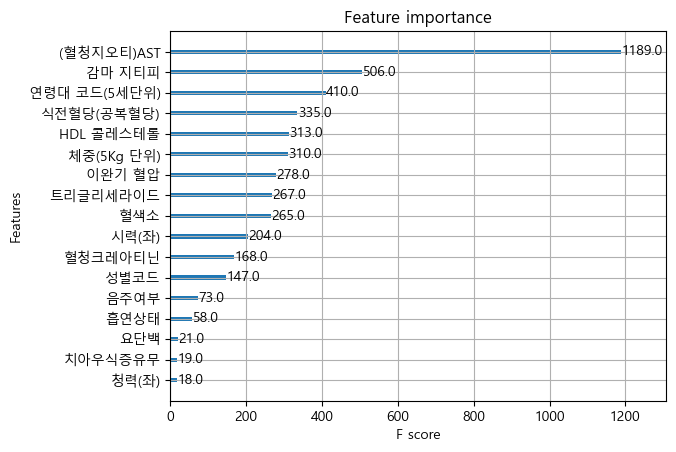

In [34]:
xgboost.plot_importance(xgb_model1)

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

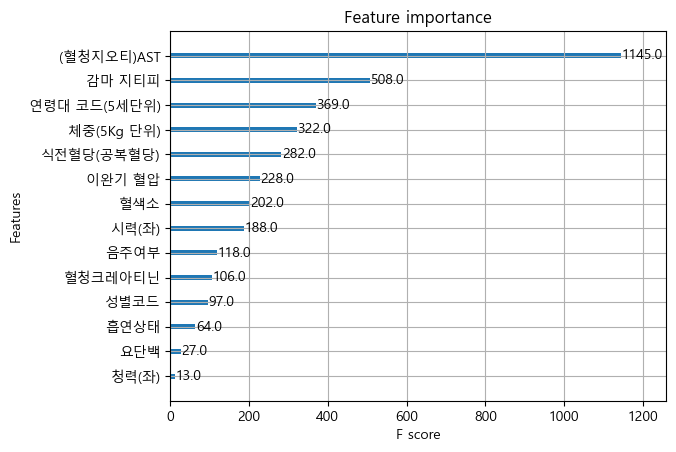

In [35]:
xgboost.plot_importance(xgb_model2)

In [36]:
print(evaluation_matrix(X_test1, y_test1, xgb_model1))
print(evaluation_matrix(X_test2, y_test2, xgb_model2))


Evaluation Matrix
MSE:   3.55339622452863e-05
RMSE:  0.0059610370108972065
MAE:   0.0032253539471762
None
Evaluation Matrix
MSE:   5.328252101975951e-06
RMSE:  0.0023083006957448048
MAE:   0.001094112113215436
None


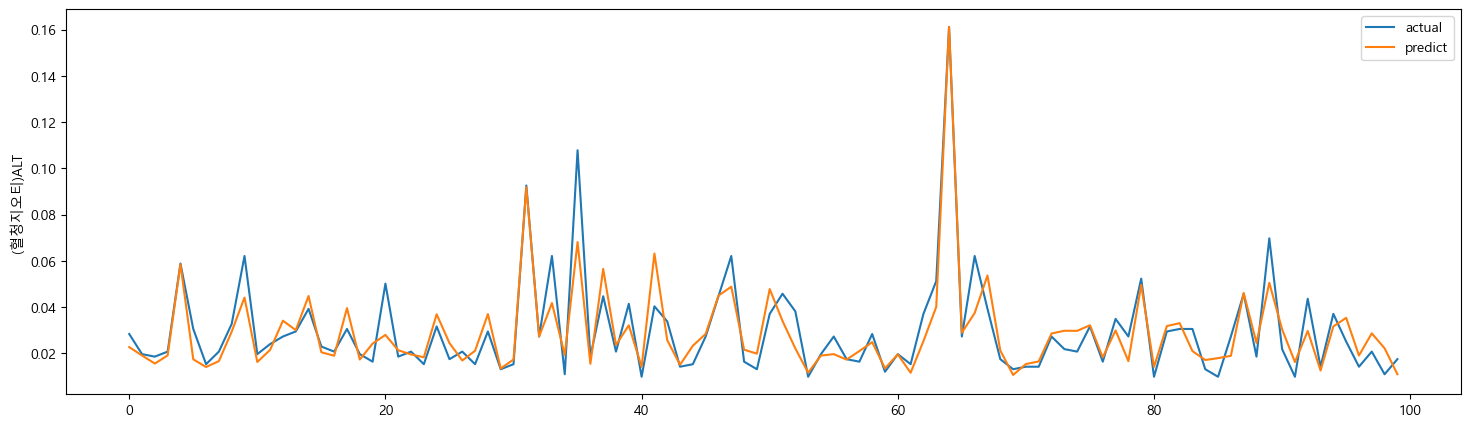

In [37]:
show_prediction(X_test1, y_test1, xgb_model1, scaler1, 100)

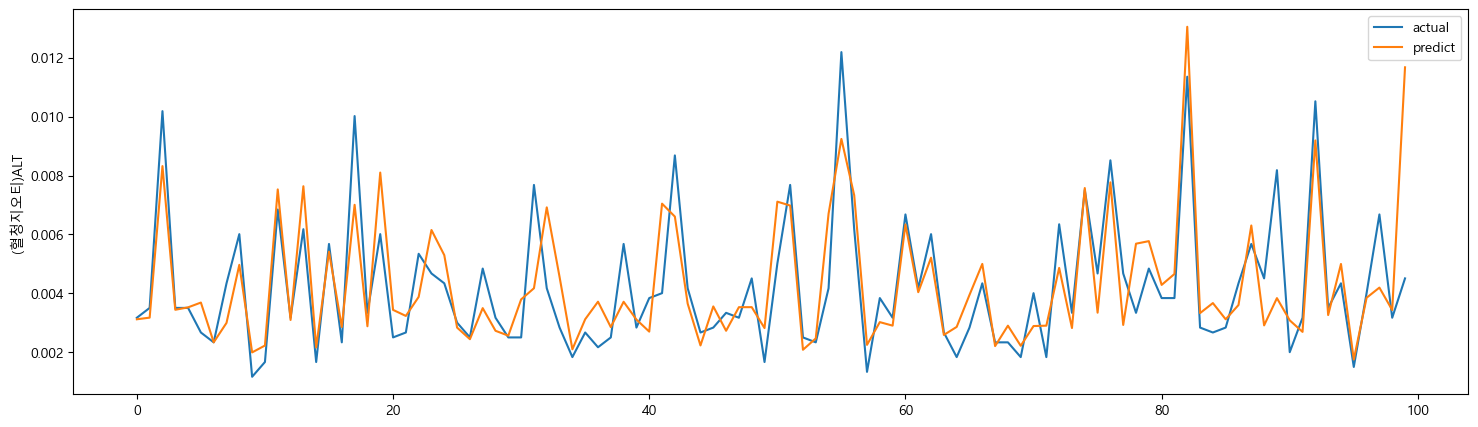

In [38]:
show_prediction(X_test2, y_test2, xgb_model2, scaler2, 100)

# 7. 정리

- 전처리 
    - 열
        - 다중공선성을 가진열 먼저 제거
        - 결측치가 많고 설명력이 적은 치아 변수 제거
        - 유의한 회귀계수 중 회귀 계수 매우 낮은 변수 (청력, 요단백, 성별코드) 제거
        - Feature importance 적은 변수 제거
    - 행
        - 결측치가 있는 행 제거

-> 남아있는 feature select
    

In [39]:
selected_columns = ['성별코드', '연령대 코드(5세단위)' ,'체중(5Kg 단위)', '시력(좌)', '이완기 혈압', '식전혈당(공복혈당)', '트리글리세라이드','HDL 콜레스테롤', '혈색소', '혈청크레아티닌', '(혈청지오티)AST', '감마 지티피' ,'흡연상태', '음주여부'] + ['(혈청지오티)ALT']

                                 OLS Regression Results                                
Dep. Variable:             (혈청지오티)ALT   R-squared (uncentered):                   0.744
Model:                            OLS   Adj. R-squared (uncentered):              0.744
Method:                 Least Squares   F-statistic:                          6.681e+04
Date:                Mon, 06 Feb 2023   Prob (F-statistic):                        0.00
Time:                        09:48:54   Log-Likelihood:                     -4.4594e+05
No. Observations:              321566   AIC:                                  8.919e+05
Df Residuals:                  321552   BIC:                                  8.921e+05
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

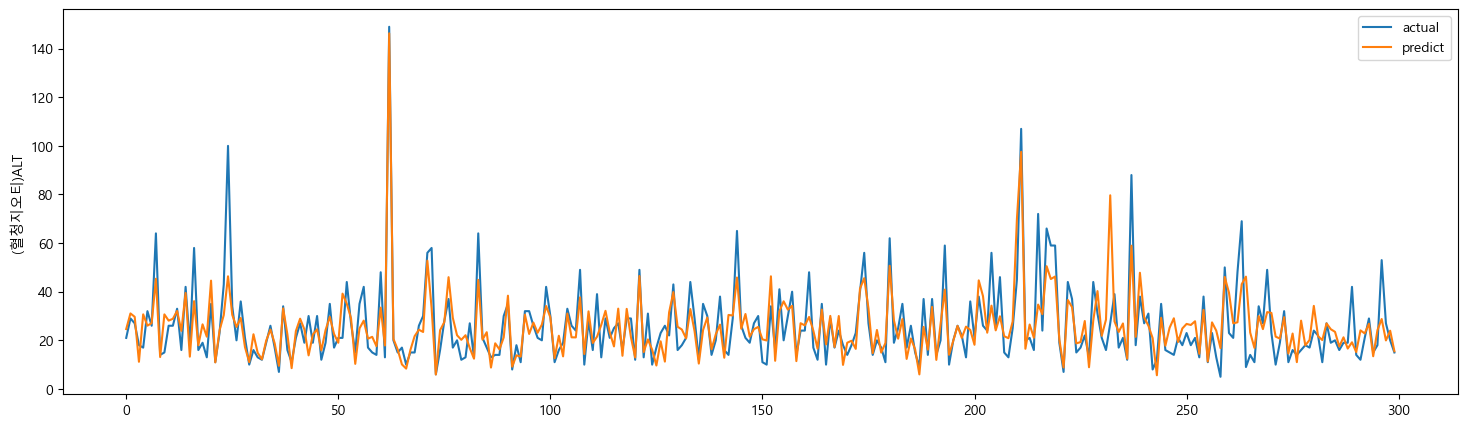

In [40]:
df3 = df[selected_columns]
df3= df3.dropna()
train3, test3 = split_dataset(df3, test_size=0.2)
# train3 = drop_outlier(train3)
scaler3, train3, test3 = scale_dataset_r(train3, test3)
X_train3, y_train3, X_test3, y_test3 = make_Xy(train3, test3)
model3 = sm.OLS(y_train3, X_train3).fit()
print(model3.summary())
evaluation_matrix(X_test3, y_test3, model3)
show_prediction(X_test3, y_test3, model3, scaler3,300)
xgb_model3 = build_XGB_model(X_train3,y_train3)

In [62]:
str(type(model1)).split()[1] == "'statsmodels.regression.linear_model.RegressionResultsWrapper'>"

True

Evaluation Matrix
MSE:   0.9313462168903615
RMSE:  0.9650628046352017
MAE:   0.42524175089250515


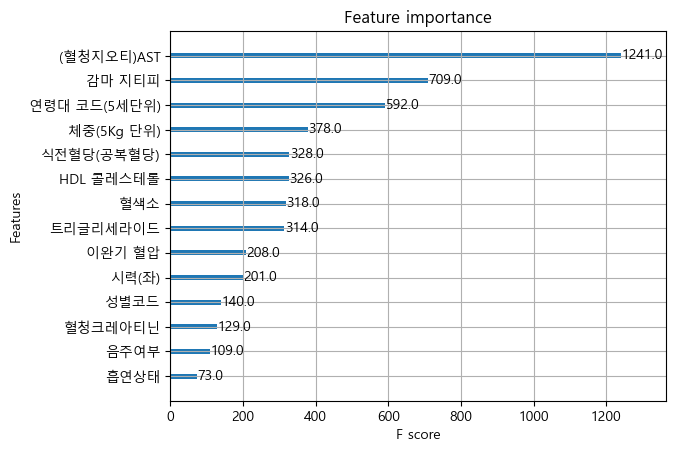

In [41]:
xgboost.plot_importance(xgb_model3)
evaluation_matrix(X_test3, y_test3, xgb_model3)

In [63]:
import dataframe_image as dfi

In [91]:
pd.DataFrame(model1.summary().tables[2])

,0,1,2,3
0,Omnibus:,112916.792,Durbin-Watson:,1.993
1,Prob(Omnibus):,0.000,Jarque-Bera (JB):,2452281834.154
2,Skew:,4.214,Prob(JB):,0.00
3,Kurtosis:,769.322,Cond. No.,inf


In [74]:
dfi.export(model1.summary(), './sdf.png', max_cols = -1, max_rows = -1)

AttributeError: 'Summary' object has no attribute 'shape'

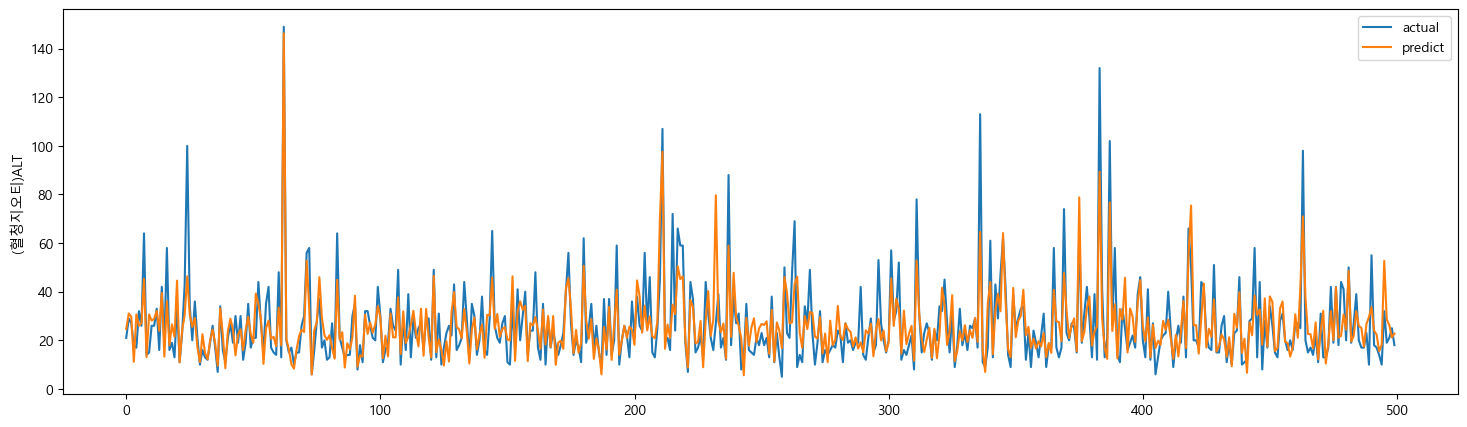

In [603]:
show_prediction(X_test3, y_test3, model3, scaler3,500)

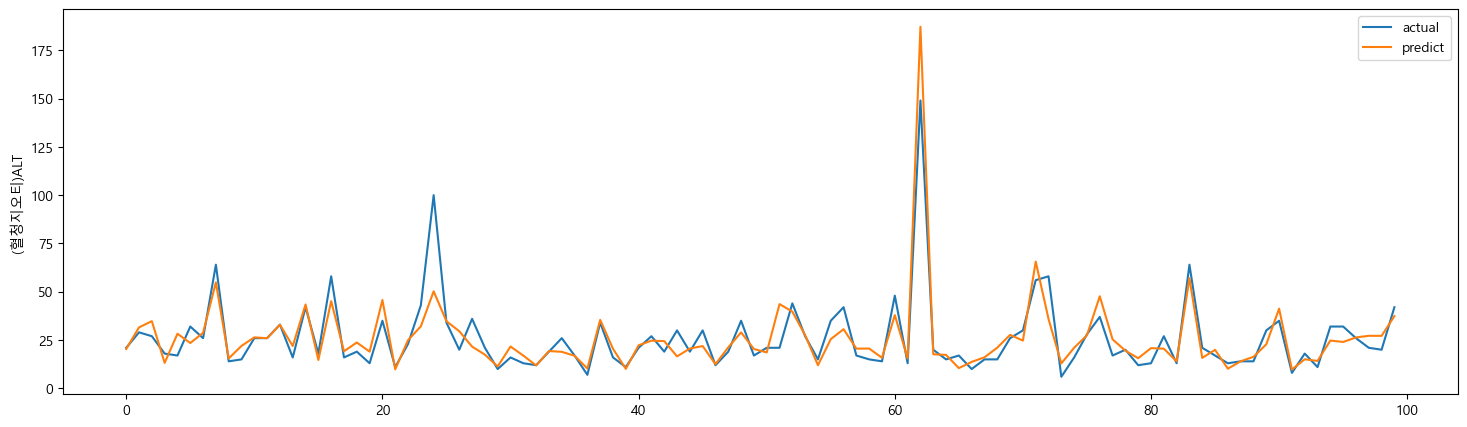

In [605]:
show_prediction(X_test3, y_test3, xgb_model3, scaler3,100)

Evaluation Matrix
MSE:   0.003206063258927756
RMSE:  0.056622109276569306
MAE:   0.02557422183149248


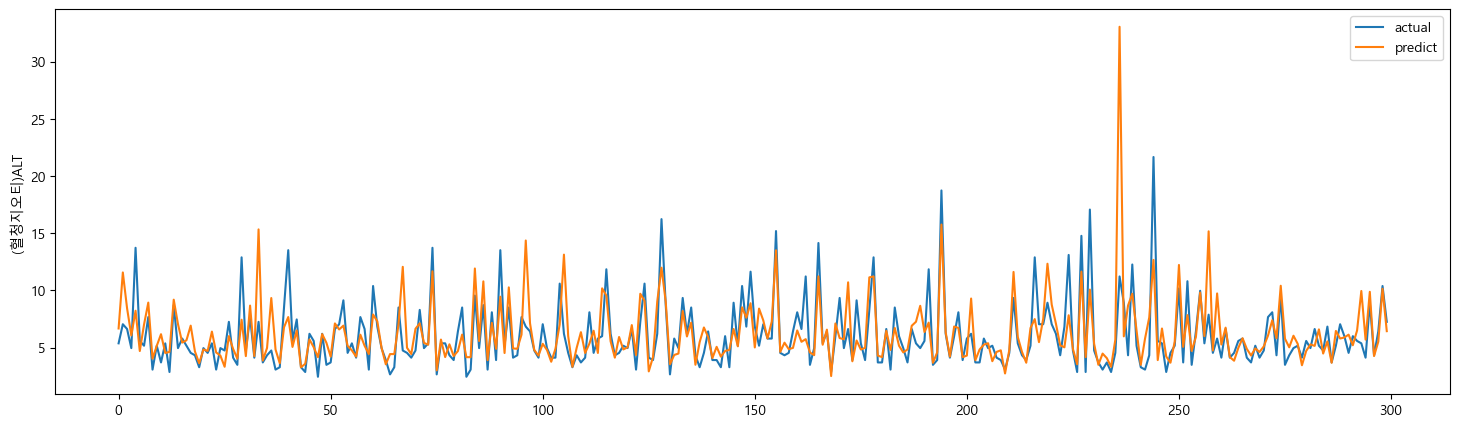

In [ ]:
selected_columns = [
 '(혈청지오티)AST',
 '(혈청지오티)ALT',
 '감마 지티피']
df4 = df[selected_columns]
df4= df4.dropna()
train4, test4 = split_dataset(df4, test_size=0.2)
train4 = drop_outlier(train4)
scaler4, train4, test4 = scale_dataset(train4, test4)
X_train4, y_train4, X_test4, y_test4 = make_Xy(train4, test4)
model4 = sm.OLS(y_train4, X_train4).fit()
model4.summary()
evaluation_matrix(X_test4, y_test4, model4)
show_prediction(X_test4, y_test4, model4, scaler4,300)

# 결론
> #### 정보 손실을 경계하며 모델 성능을 높일 방법을 생각해야함


1. 모델 성능을 높이는 것이 목적이라면, 결측치가 있는 행를 제거할 것인지 결측치가 많은 열을 제거할 것인지 모델 성능을 보고 비교해야함
2. 이상치를 어느정도까지 제거할 지 모델 성능을 보고 판단해야함
3. 목적에 맞지않는 (혈청 ALT에 영향을 주지 않는 컬럼 제거 필요)
4. 다중공선성은 회귀분석에 큰 영향을 미치므로 확인 필요

> ##### 추후 다른 모델 적용 필요